Existing 'premier_league' DataFrames found. Skipping regeneration.

--- Step 1: Feature Engineering - Aggregating Player Stats to Per 90 Minutes ---

--- Analyzing Player Group: Defenders ---

--- Step 2: Data Standardization for Defenders ---
Data successfully standardized for this group.

--- Step 3: Determining Optimal K using Elbow Method for Defenders ---


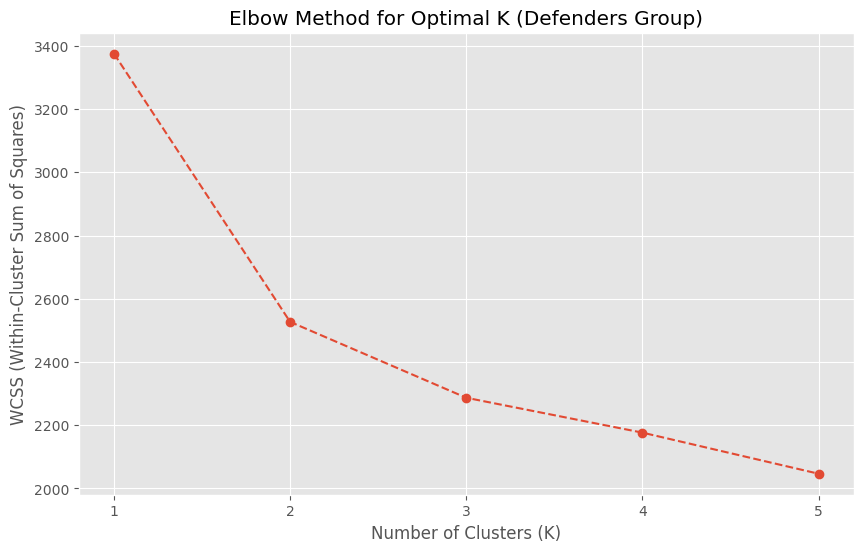

Review the Elbow Method plot above to choose an optimal 'K' for the 'Defenders' group.

--- Step 4: Hierarchical Clustering - Generating Dendrogram for Defenders ---
Note: 'ward' linkage criterion only works with 'euclidean' distance. Using 'euclidean' for Defenders.


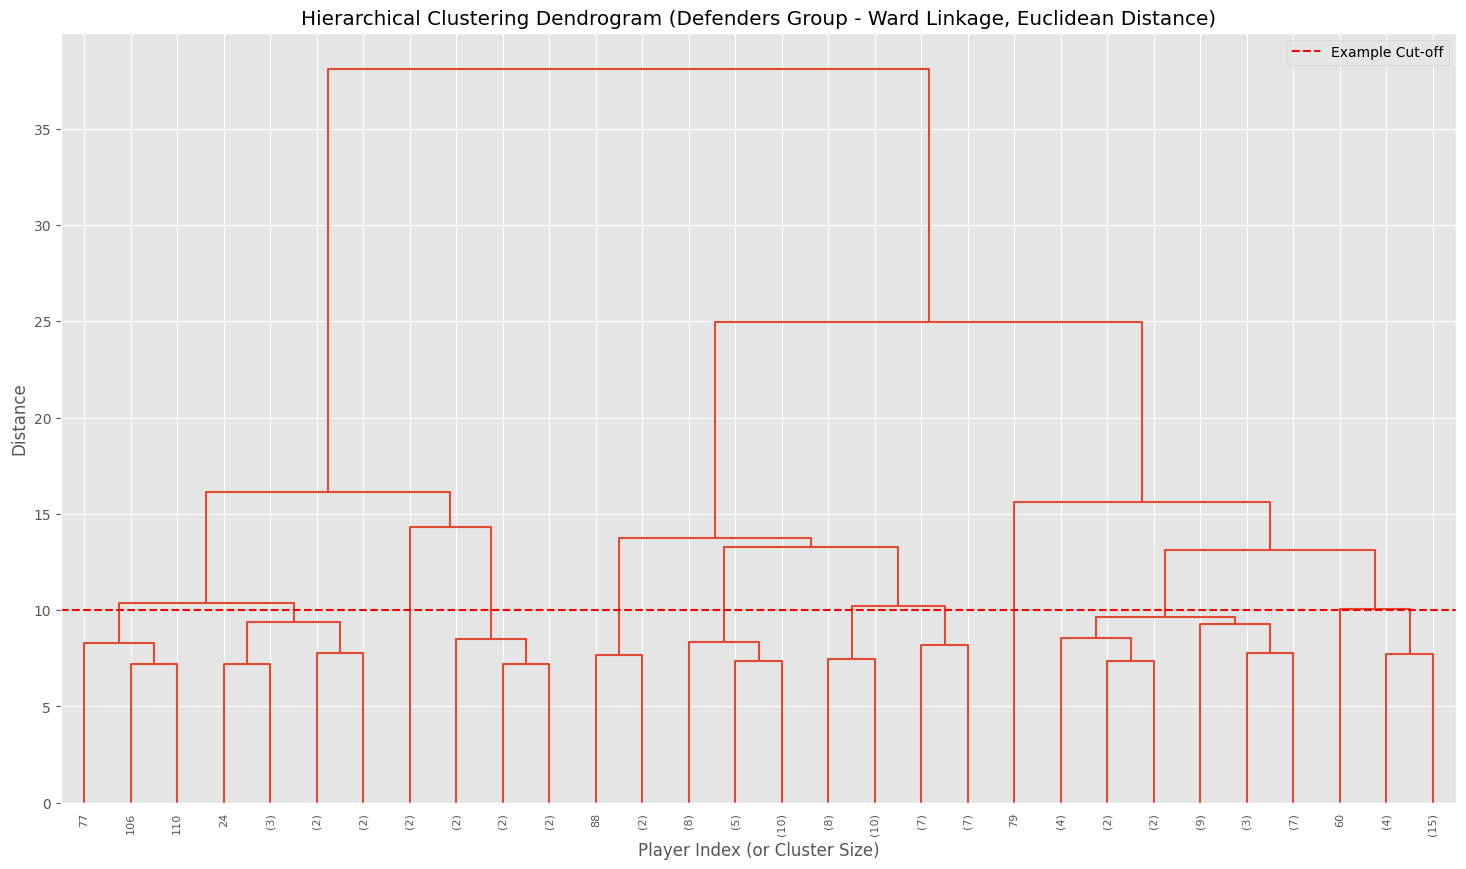


Review the dendrogram for the 'Defenders' group to identify appropriate 'cut-off' points.

--- Step 5: Applying Hierarchical Clustering with K = 5 for Defenders ---
Hierarchical clustering applied for Defenders group. 5 clusters identified.

--- Step 6: Interpreting Hierarchical Clusters - Player Role Profiles for Defenders ---

Average (Unscaled) P90 Stats for Each Hierarchical Cluster (Defenders Group Profiles):
   hierarchical_cluster  passes_p90_avg  progressive_pass_distance_p90_avg  \
0                     0       87.102505                        1425.726255   
1                     1       88.545461                        1386.378126   
2                     2       89.320804                         913.776136   
3                     3       91.610137                        2292.819426   
4                     4       92.776153                        1055.399808   

   passes_into_final_third_p90_avg  key_passes_p90_avg  short_passes_p90_avg  \
0                        11.6627

<ipython-input-3-eb1fe33df0a3>:476: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_group = plt.cm.get_cmap('tab10', optimal_k_group)


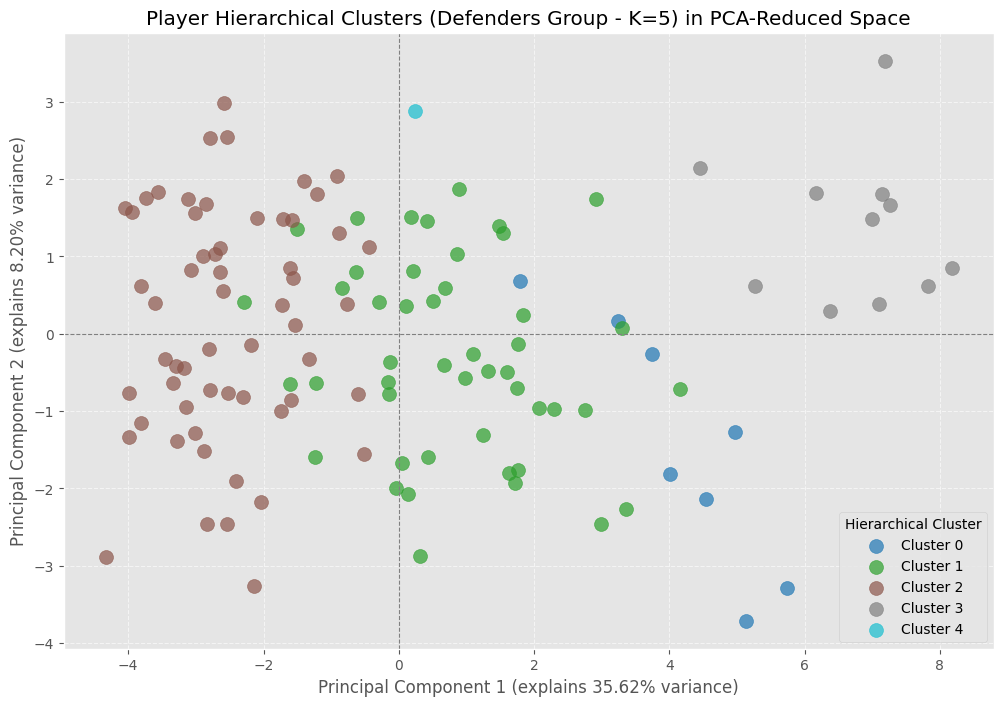

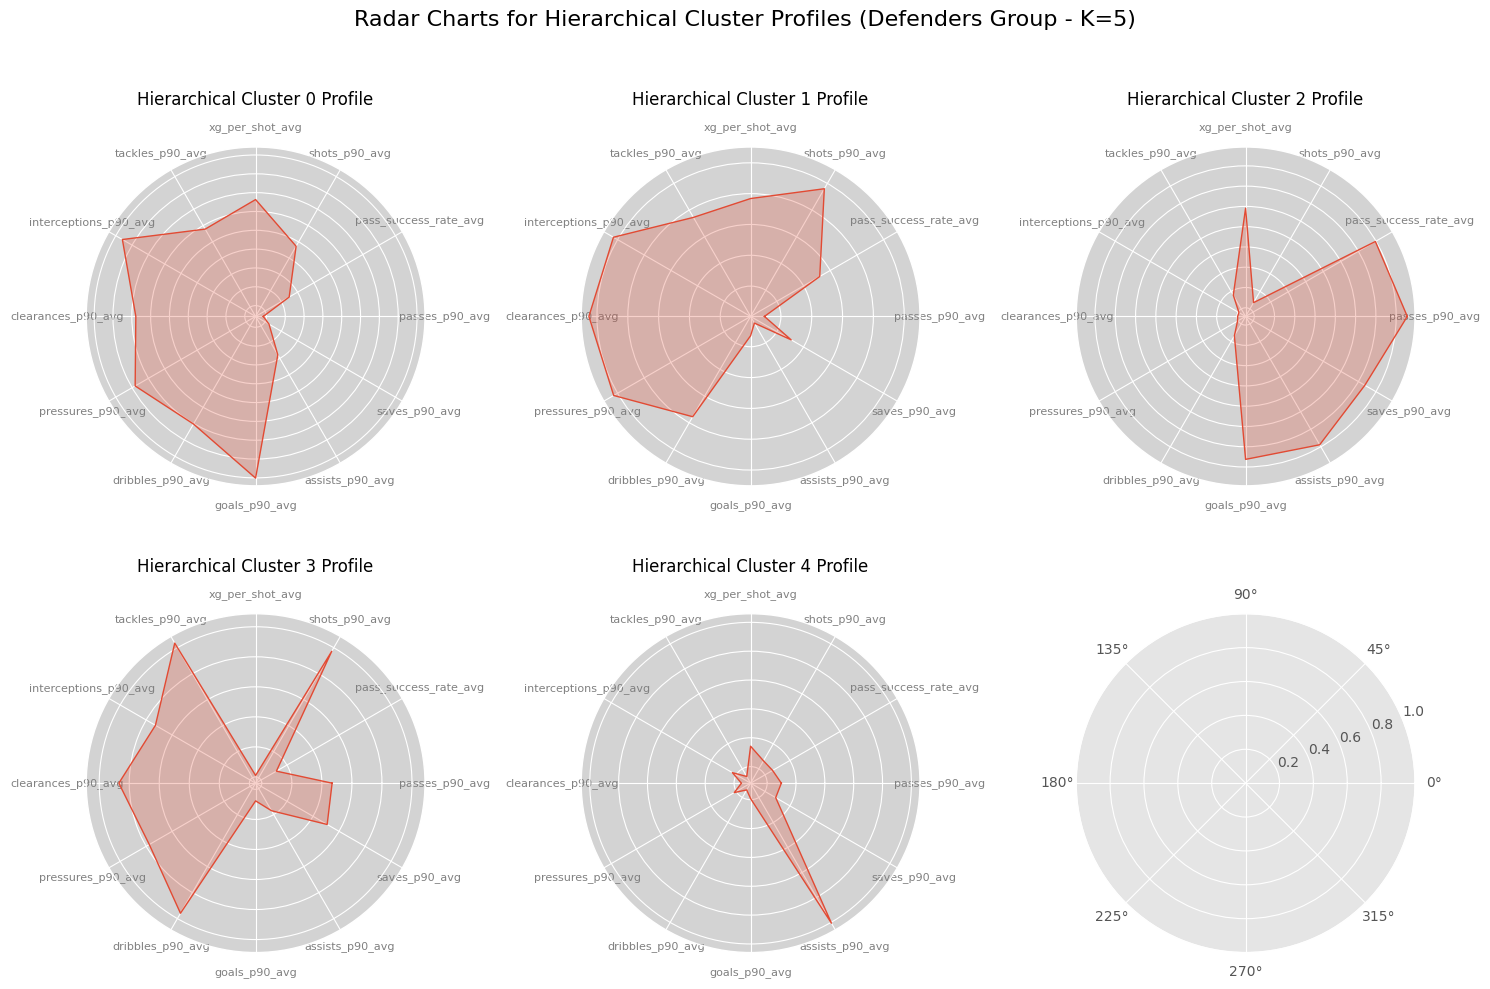


--- Summary for Defenders Group ---
Hierarchical Clustering identified 5 distinct player roles within the Defenders group.
The PCA plot shows the separation of these roles in a 2D space, and the radar charts visually represent their average profiles.

--- Analyzing Player Group: Midfielders ---

--- Step 2: Data Standardization for Midfielders ---
Data successfully standardized for this group.

--- Step 3: Determining Optimal K using Elbow Method for Midfielders ---


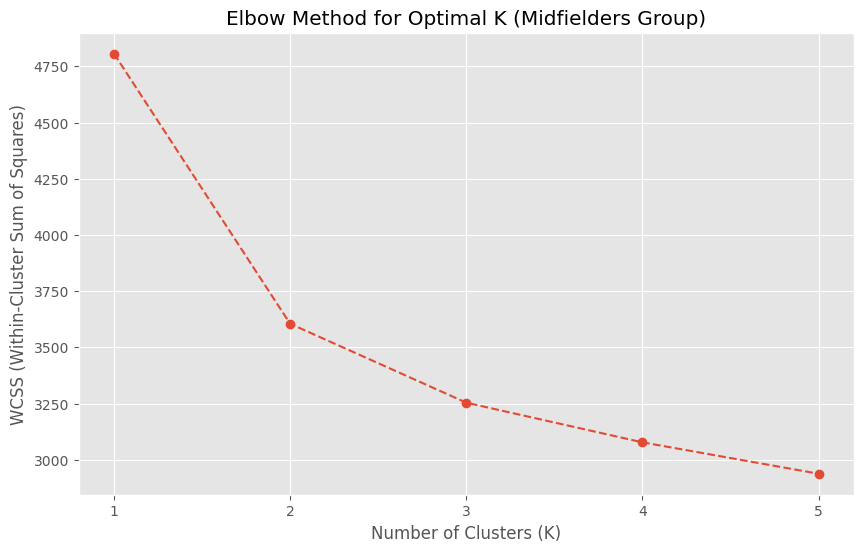

Review the Elbow Method plot above to choose an optimal 'K' for the 'Midfielders' group.

--- Step 4: Hierarchical Clustering - Generating Dendrogram for Midfielders ---
Note: 'ward' linkage criterion only works with 'euclidean' distance. Using 'euclidean' for Midfielders.


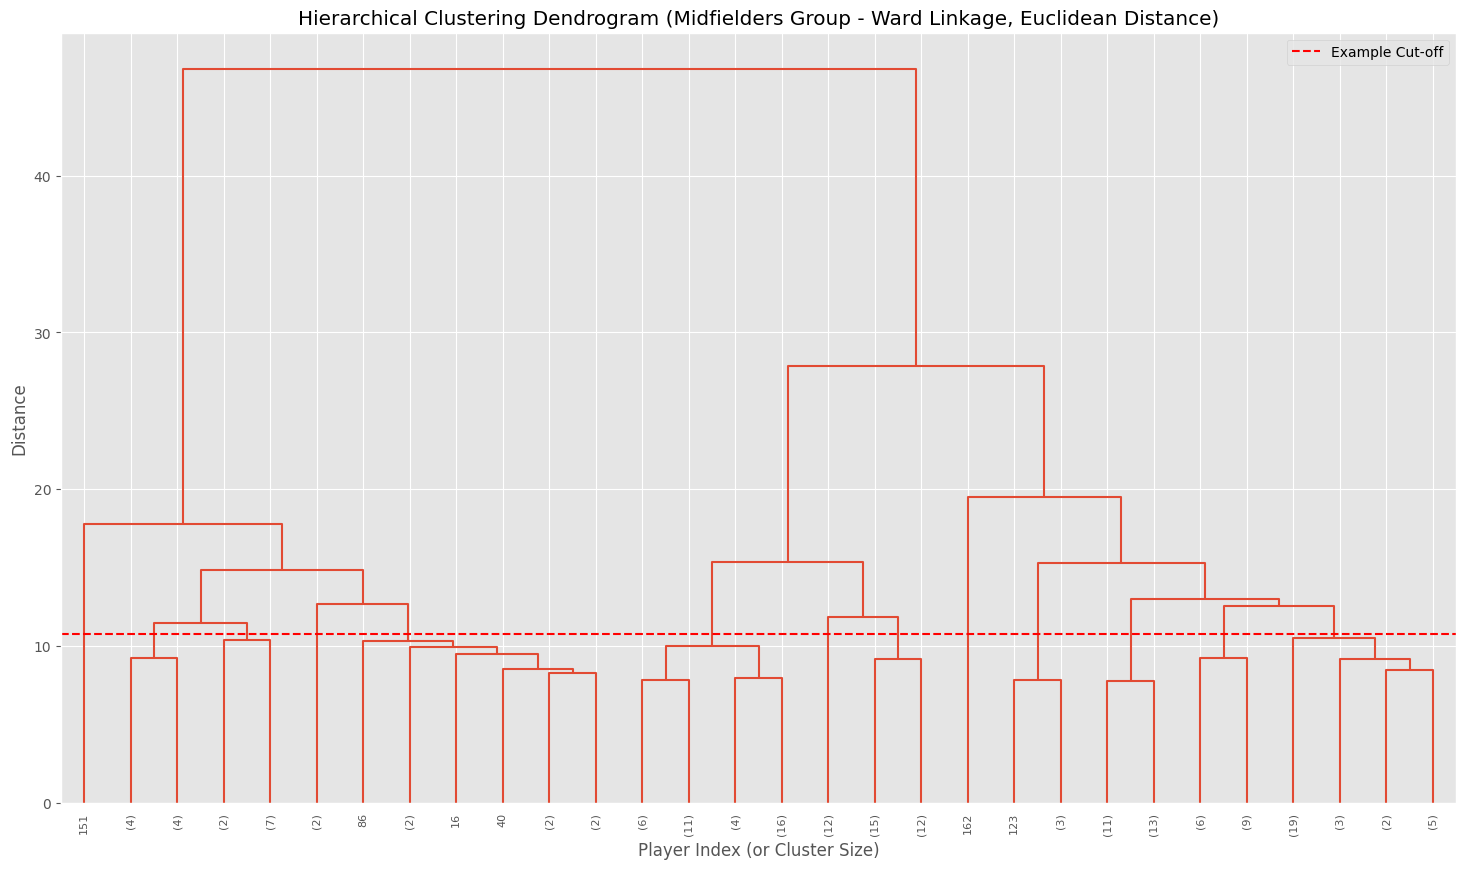


Review the dendrogram for the 'Midfielders' group to identify appropriate 'cut-off' points.

--- Step 5: Applying Hierarchical Clustering with K = 5 for Midfielders ---
Hierarchical clustering applied for Midfielders group. 5 clusters identified.

--- Step 6: Interpreting Hierarchical Clusters - Player Role Profiles for Midfielders ---

Average (Unscaled) P90 Stats for Each Hierarchical Cluster (Midfielders Group Profiles):
   hierarchical_cluster  passes_p90_avg  progressive_pass_distance_p90_avg  \
0                     0       89.980474                         904.107450   
1                     1       89.439772                        1397.804538   
2                     2       88.920768                        2039.054159   
3                     3       94.802082                        2157.971300   
4                     4       84.798772                        3566.810465   

   passes_into_final_third_p90_avg  key_passes_p90_avg  short_passes_p90_avg  \
0                     

<ipython-input-3-eb1fe33df0a3>:476: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_group = plt.cm.get_cmap('tab10', optimal_k_group)


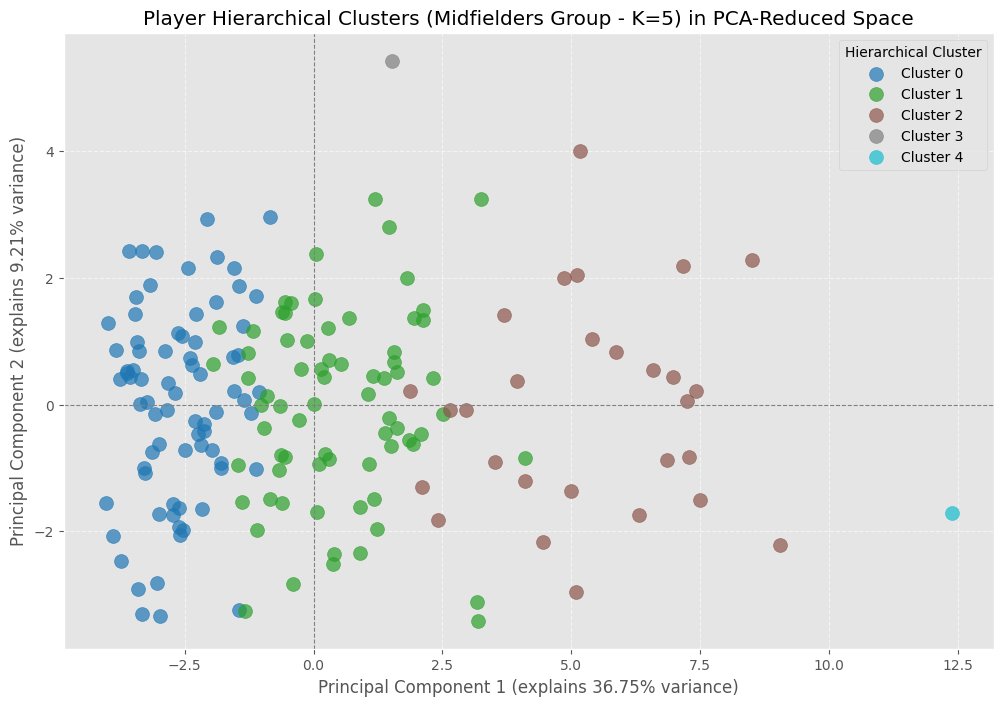

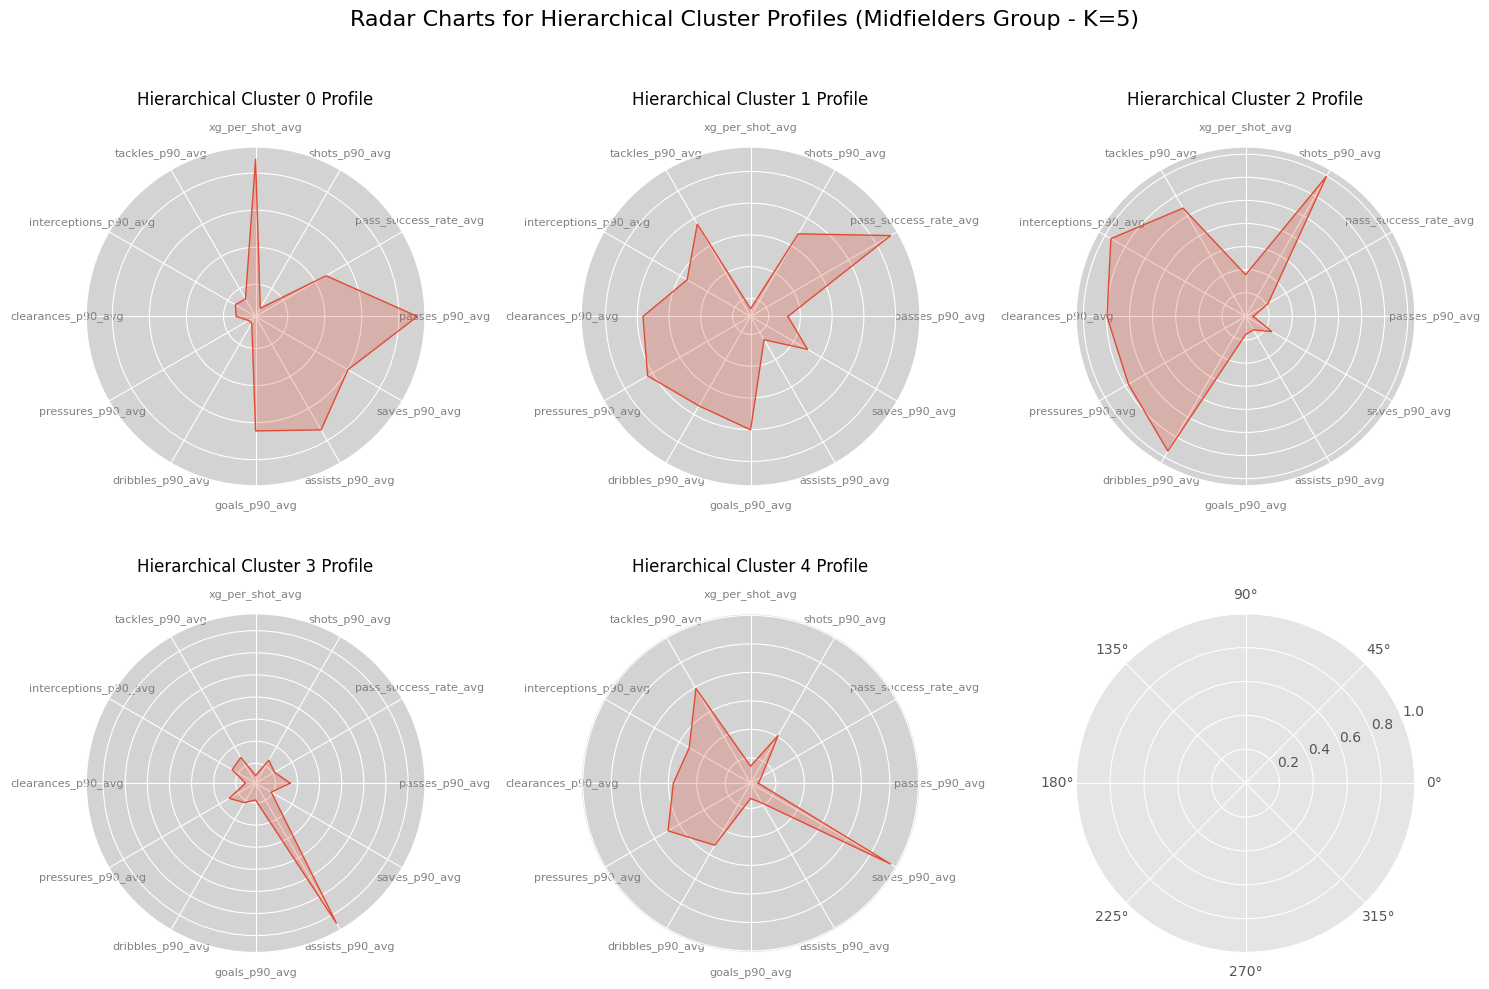


--- Summary for Midfielders Group ---
Hierarchical Clustering identified 5 distinct player roles within the Midfielders group.
The PCA plot shows the separation of these roles in a 2D space, and the radar charts visually represent their average profiles.

--- Analyzing Player Group: Attackers ---

--- Step 2: Data Standardization for Attackers ---
Data successfully standardized for this group.

--- Step 3: Determining Optimal K using Elbow Method for Attackers ---


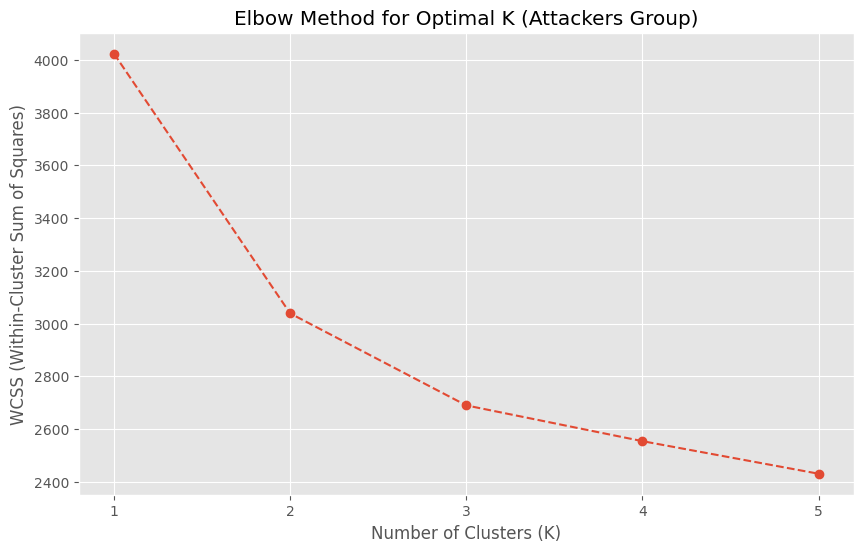

Review the Elbow Method plot above to choose an optimal 'K' for the 'Attackers' group.

--- Step 4: Hierarchical Clustering - Generating Dendrogram for Attackers ---
Note: 'ward' linkage criterion only works with 'euclidean' distance. Using 'euclidean' for Attackers.


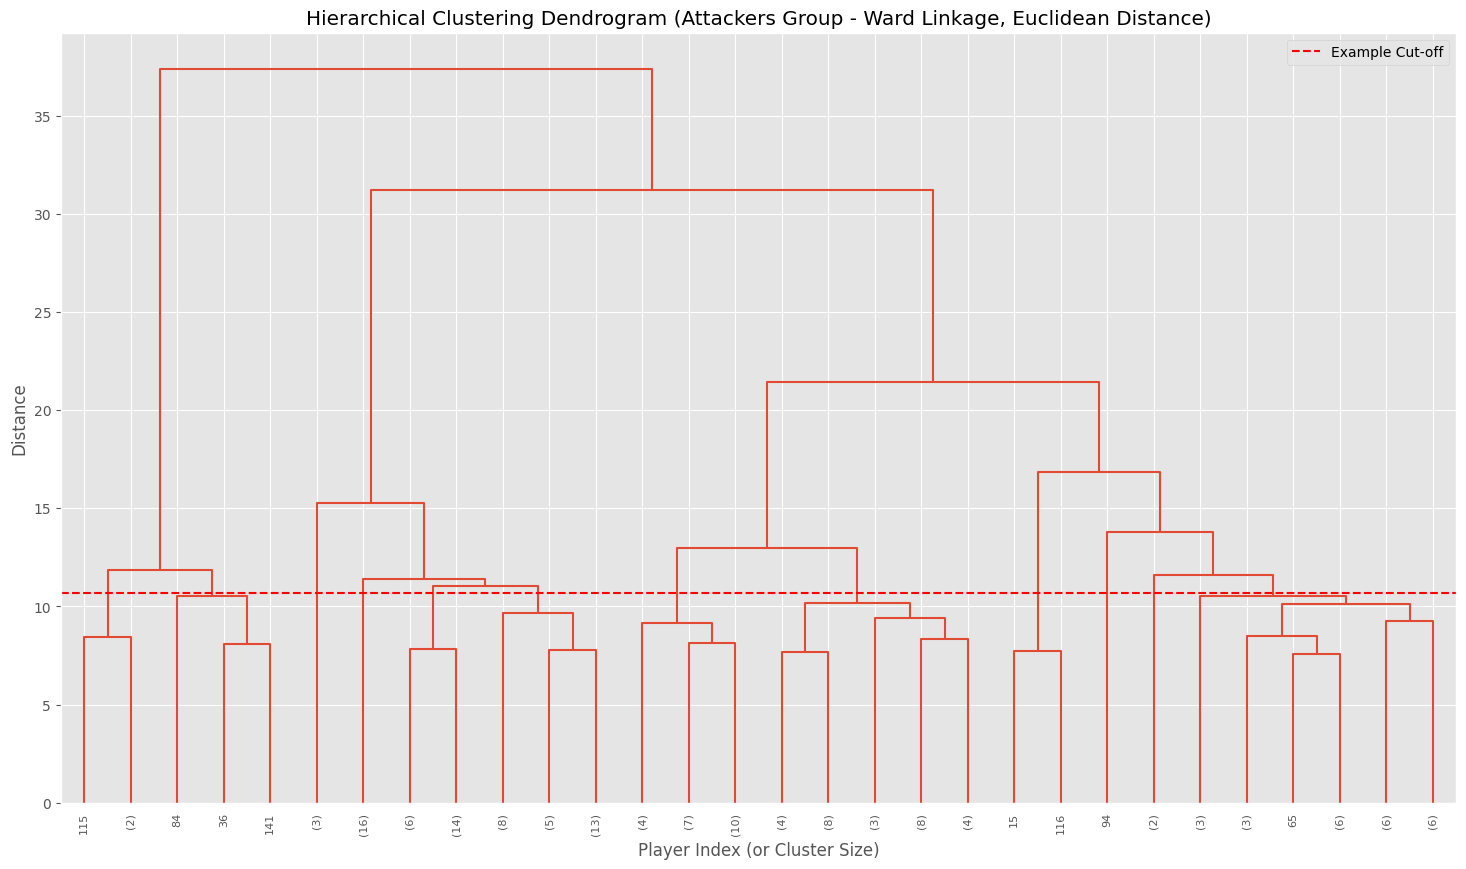


Review the dendrogram for the 'Attackers' group to identify appropriate 'cut-off' points.

--- Step 5: Applying Hierarchical Clustering with K = 5 for Attackers ---
Hierarchical clustering applied for Attackers group. 5 clusters identified.

--- Step 6: Interpreting Hierarchical Clusters - Player Role Profiles for Attackers ---

Average (Unscaled) P90 Stats for Each Hierarchical Cluster (Attackers Group Profiles):
   hierarchical_cluster  passes_p90_avg  progressive_pass_distance_p90_avg  \
0                     0       90.460286                         906.203501   
1                     1       87.186536                        1299.249205   
2                     2       90.089376                        1826.975808   
3                     3       88.588289                        2618.439728   
4                     4       90.021179                        1635.759964   

   passes_into_final_third_p90_avg  key_passes_p90_avg  short_passes_p90_avg  \
0                        13.4762

<ipython-input-3-eb1fe33df0a3>:476: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_group = plt.cm.get_cmap('tab10', optimal_k_group)


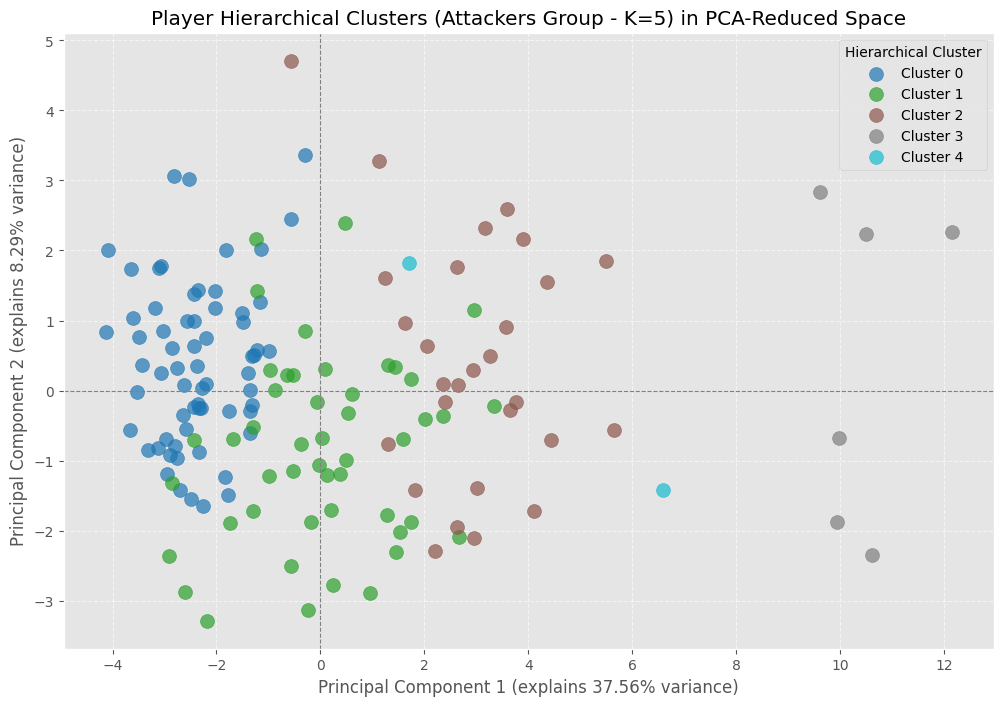

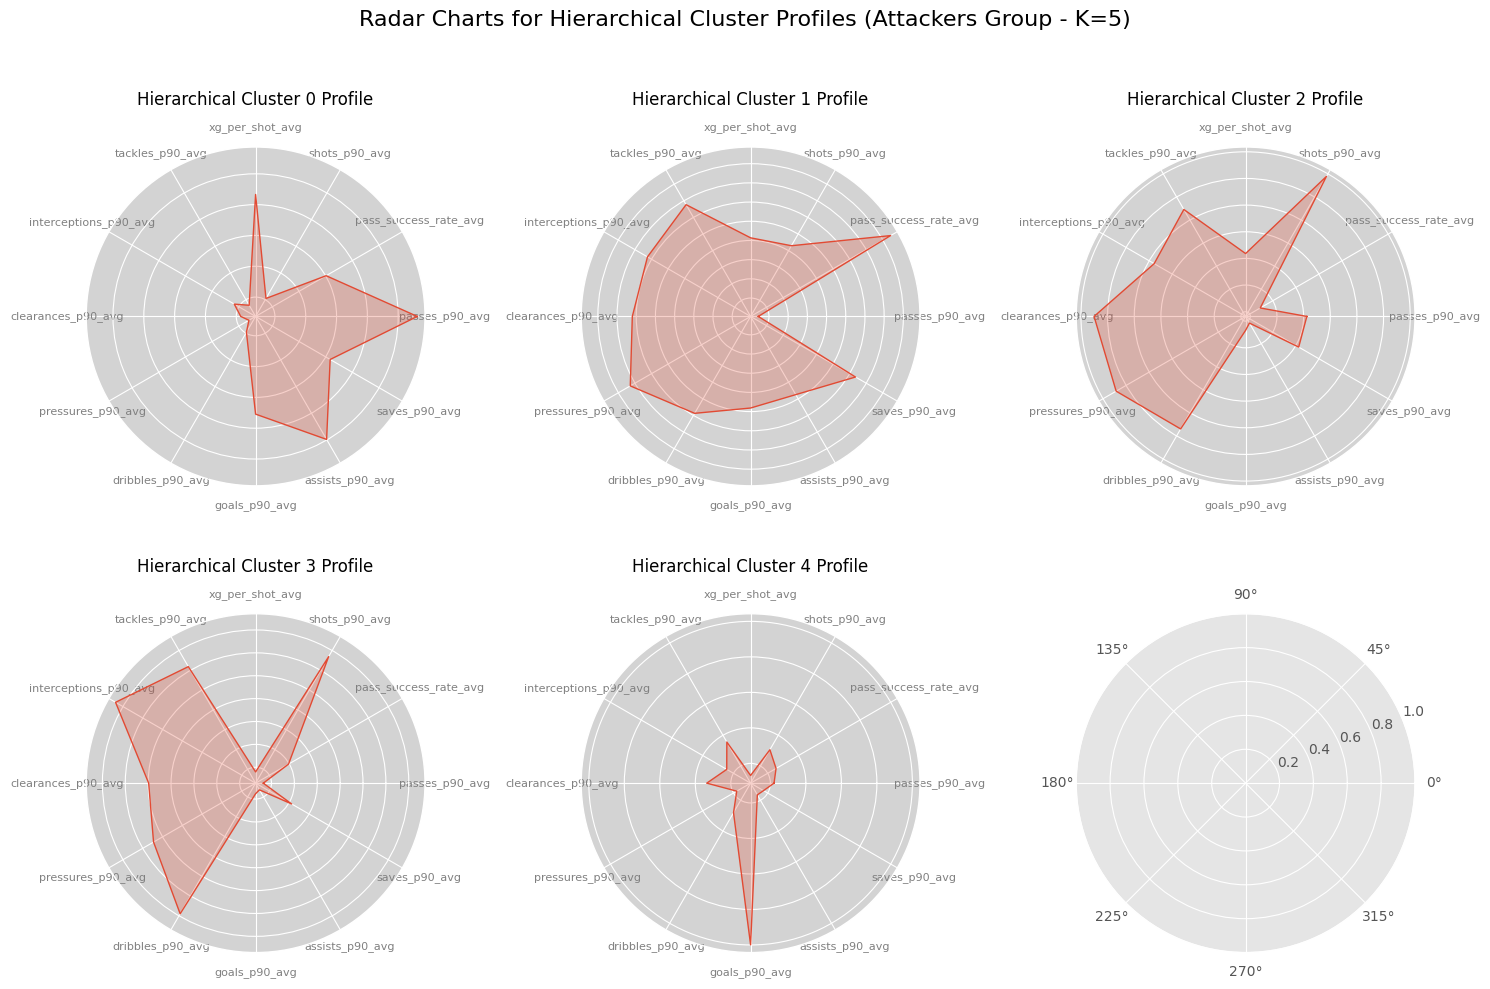


--- Summary for Attackers Group ---
Hierarchical Clustering identified 5 distinct player roles within the Attackers group.
The PCA plot shows the separation of these roles in a 2D space, and the radar charts visually represent their average profiles.

--- Overall Analysis Complete ---
You can now examine the clustering results for each player role group individually.
To experiment further, remember to adjust 'selected_linkage_method', 'selected_distance_metric', and 'optimal_k_hierarchical' (or 'optimal_k_group' inside the loop) as needed.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import random
from datetime import datetime, timedelta

# Ensure consistent plot style
plt.style.use('ggplot')

# --- Configuration for Data Generation (Re-defined for full script) ---
NUM_TEAMS = 20
NUM_PLAYERS_PER_TEAM = 25
NUM_MATCHES_PER_SEASON = 380
SEASONS_TO_GENERATE = 3
START_YEAR = 2022

POSITIONS = [
    "Goalkeeper", "Right Back", "Left Back", "Centre Back", "Defensive Midfielder",
    "Central Midfielder", "Attacking Midfielder", "Right Winger", "Left Winger",
    "Striker", "Second Striker"
]
PITCH_LENGTH = 105
PITCH_WIDTH = 68
POSITION_BASE_COORDS = {
    "Goalkeeper": (5, PITCH_WIDTH / 2), "Right Back": (20, 5), "Left Back": (20, PITCH_WIDTH - 5),
    "Centre Back": (15, PITCH_WIDTH / 2), "Defensive Midfielder": (35, PITCH_WIDTH / 2),
    "Central Midfielder": (50, PITCH_WIDTH / 2), "Attacking Midfielder": (70, PITCH_WIDTH / 2),
    "Right Winger": (75, 10), "Left Winger": (75, PITCH_WIDTH - 10), "Striker": (90, PITCH_WIDTH / 2),
    "Second Striker": (85, PITCH_WIDTH / 2 + 5)
}
FORMATIONS = ["4-3-3", "4-2-3-1", "4-4-2", "3-5-2", "4-3-2-1", "5-3-2"] # For team stats

PREMIER_LEAGUE_TEAMS = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton & Hove Albion",
    "Chelsea", "Crystal Palace", "Everton", "Fulham", "Liverpool",
    "Luton Town", "Manchester City", "Manchester United", "Newcastle United",
    "Nottingham Forest", "Sheffield United", "Tottenham Hotspur", "West Ham United",
    "Wolverhampton Wanderers", "Burnley"
]
FIRST_NAMES = [
    "Aaron", "Alphonse", "Bukayo", "Bruno", "Cody", "Conor", "Declan", "Diogo", "Dominik",
    "Ederson", "Erling", "Ethan", "Fabinho", "Federico", "Gabriel", "Harry", "Jack", "James",
    "Jarrod", "Joao", "John", "Jordan", "Julian", "Kai", "Kevin", "Lewis", "Liam", "Lisandro",
    "Luis", "Manuel", "Marcus", "Martin", "Mason", "Mohamed", "Nathan", "Nicolas", "Ollie",
    "Oscar", "Phil", "Pierre-Emile", "Raphael", "Richarlison", "Rodri", "Ruben", "Son", "Thiago",
    "Trent", "Virgil", "William"
]
LAST_NAMES = [
    "Aaron", "Alvarez", "Alexander-Arnold", "Alisson", "Antony", "Arrizabalaga", "Arteta", "Awoniyi",
    "Becker", "Benrahma", "Bissouma", "Bowen", "Cancelo", "Casemiro", "Chalobah", "Chilwell", "Colwill",
    "Cucurella", "De Bruyne", "Dias", "Diaz", "Doku", "Enzo", "Eze", "Fofana", "Foden", "Gallagher",
    "Garnacho", "Grealish", "Guimaraes", "Haaland", "Jackson", "James", "Jota", "Kane", "Konate",
    "Kulusevski", "Lamptey", "Leno", "Mac Allister", "Maguire", "Martinez", "Mbappe", "Mount", "Mudryk",
    "Nunez", "Odegaard", "Onana", "Palace", "Palmer", "Partey", "Pedro", "Phillips", "Pickford",
    "Pope", "Rashford", "Rice", "Rodri", "Ronaldo", "Saliba", "Salah", "Sarr", "Saka", "Shaw", "Silva",
    "Son", "Sterling", "Stones", "Sulemana", "Szoboszlai", "Thiago", "Tielemans", "Trippier", "Turner",
    "Van Dijk", "Varane", "Vlasic", "Ward-Prowse", "Watkins", "White", "Zinchenko"
]

# --- Data Generation Functions (Re-defined for full script) ---

def generate_teams(num_teams_g):
    """Generates fictitious team data using real Premier League names."""
    teams_list = []
    actual_num_teams = min(num_teams_g, len(PREMIER_LEAGUE_TEAMS))
    selected_teams = random.sample(PREMIER_LEAGUE_TEAMS, actual_num_teams)
    for i, team_name in enumerate(selected_teams):
        teams_list.append({"team_id": i + 1, "team_name": team_name})
    return pd.DataFrame(teams_list)

def generate_players(teams_df_g, num_players_per_team_g):
    """Generates fictitious player data for each team using real-sounding names."""
    all_players_list = []
    player_id_counter = 1
    generated_names = set()
    for _, team in teams_df_g.iterrows():
        for i in range(num_players_per_team_g):
            player_name = ""
            while player_name in generated_names or player_name == "":
                player_first = random.choice(FIRST_NAMES)
                player_last = random.choice(LAST_NAMES)
                player_name = f"{player_first} {player_last}"
            generated_names.add(player_name)
            all_players_list.append({
                "player_id": player_id_counter, "player_name": player_name,
                "team_id": team["team_id"], "team_name": team["team_name"],
                "height_cm": random.randint(165, 195), "weight_kg": random.randint(60, 95),
                "dominant_foot": random.choice(["Right", "Left", "Both"])
            })
            player_id_counter += 1
    return pd.DataFrame(all_players_list)

def generate_matches(teams_df_g, season_name_g, num_matches_g):
    """Generates fictitious match data for a season."""
    matches_list = []
    match_id_counter = 1
    all_team_ids = teams_df_g['team_id'].tolist()
    all_possible_pairs = [(i, j) for i in all_team_ids for j in all_team_ids if i != j]
    selected_match_pairs = random.sample(all_possible_pairs, min(num_matches_g, len(all_possible_pairs)))
    season_start_date = datetime(int(season_name_g.split('/')[0]), 8, 1)
    days_in_season = 270
    for home_team_id, away_team_id in selected_match_pairs:
        home_team_name = teams_df_g[teams_df_g['team_id'] == home_team_id]['team_name'].iloc[0]
        away_team_name = teams_df_g[teams_df_g['team_id'] == away_team_id]['team_name'].iloc[0]
        home_score = random.randint(0, 5)
        away_score = random.randint(0, 4)
        match_date = season_start_date + timedelta(days=random.randint(0, days_in_season))
        matches_list.append({
            "match_id": match_id_counter, "season": season_name_g, "home_team_id": home_team_id,
            "home_team_name": home_team_name, "away_team_id": away_team_id, "away_team_name": away_team_name,
            "home_score": home_score, "away_score": away_score,
            "match_date": match_date.strftime("%Y-%m-%d")
        })
        match_id_counter += 1
    return pd.DataFrame(matches_list)

def generate_player_match_stats(matches_df_g, players_df_g):
    """Generates fictitious player statistics and positions for each match."""
    all_player_match_stats_list = []
    all_player_positions_list = []
    for _, match in matches_df_g.iterrows():
        match_id = match['match_id']
        home_team_id = match['home_team_id']
        away_team_id = match['away_team_id']
        home_players_squad = players_df_g[players_df_g['team_id'] == home_team_id]
        away_players_squad = players_df_g[players_df_g['team_id'] == away_team_id]
        home_match_squad = home_players_squad.sample(min(18, len(home_players_squad)), random_state=match_id).to_dict('records')
        away_match_squad = away_players_squad.sample(min(18, len(away_players_squad)), random_state=match_id + 1).to_dict('records')

        for player_list, team_id_in_match in [(home_match_squad, home_team_id), (away_match_squad, away_team_id)]:
            num_players_who_played = min(len(player_list), random.randint(11, 14))
            playing_players = random.sample(player_list, num_players_who_played)

            for i, player in enumerate(playing_players):
                player_id = player['player_id']
                player_name = player['player_name']
                team_name = player['team_name']
                position_name = random.choice(POSITIONS)
                is_goalkeeper = (position_name == "Goalkeeper")
                minutes_played = random.randint(60, 90) if i < 11 else random.randint(1, 30)

                base_x, base_y = POSITION_BASE_COORDS.get(position_name, (PITCH_LENGTH/2, PITCH_WIDTH/2))
                player_avg_x = np.clip(base_x + np.random.normal(0, 5), 0, PITCH_LENGTH)
                player_avg_y = np.clip(base_y + np.random.normal(0, 5), 0, PITCH_WIDTH)

                total_passes = random.randint(max(0, int(minutes_played * 0.5)), int(minutes_played * 1.5))
                pass_success_rate = np.random.uniform(0.65, 0.95)
                progressive_pass_distance = random.randint(0, 1000)
                passes_into_final_third = random.randint(0, int(total_passes * 0.3))
                key_passes = random.randint(0, 5)
                short_p = random.randint(int(0.5 * total_passes), total_passes)
                long_p = random.randint(0, total_passes - short_p)
                through_b = total_passes - short_p - long_p
                short_passes = max(0, short_p)
                long_passes = max(0, long_p)
                through_balls = max(0, through_b)
                total_shots = random.randint(0, 5) if not is_goalkeeper else random.randint(0, 1)
                shots_on_target = random.randint(0, total_shots)
                xg_per_shot = np.random.uniform(0.01, 0.4) if total_shots > 0 else 0.0
                tackles = random.randint(0, 6)
                interceptions = random.randint(0, 5)
                clearances = random.randint(0, 8)
                pressures = random.randint(0, 30)
                dribbles = random.randint(0, 7) if not is_goalkeeper else 0
                successful_dribbles = random.randint(0, dribbles)
                progressive_carries = random.randint(0, 15) if not is_goalkeeper else 0
                carries_into_final_third = random.randint(0, int(progressive_carries * 0.5)) if not is_goalkeeper else 0
                fouls_committed = random.randint(0, 4)
                fouls_won = random.randint(0, 4)
                goals = np.random.poisson(0.1) if random.random() < 0.2 and not is_goalkeeper else 0
                assists = np.random.poisson(0.05) if random.random() < 0.1 and not is_goalkeeper else 0
                saves = random.randint(0, 10) if is_goalkeeper else 0
                aerial_duels_won = random.randint(0, 7)

                all_player_match_stats_list.append({
                    "match_id": match_id, "player_id": player_id, "player_name": player_name,
                    "team_id": team_id_in_match, "team_name": team_name, "position_name": position_name,
                    "minutes_played": minutes_played, "passes": total_passes, "pass_success_rate": round(pass_success_rate, 2),
                    "progressive_pass_distance": progressive_pass_distance, "passes_into_final_third": passes_into_final_third,
                    "key_passes": key_passes, "short_passes": short_passes, "long_passes": long_passes,
                    "through_balls": through_balls, "shots": total_shots, "shots_on_target": shots_on_target,
                    "xg_per_shot": round(xg_per_shot, 3), "tackles": tackles, "interceptions": interceptions,
                    "clearances": clearances, "pressures": pressures, "dribbles": dribbles,
                    "successful_dribbles": successful_dribbles, "progressive_carries": progressive_carries,
                    "carries_into_final_third": carries_into_final_third, "fouls_committed": fouls_committed,
                    "fouls_won": fouls_won, "goals": goals, "assists": assists, "saves": saves,
                    "aerial_duels_won": aerial_duels_won, "player_average_x": round(player_avg_x, 1),
                    "player_average_y": round(player_avg_y, 1)
                })
                all_player_positions_list.append({
                    "match_id": match_id, "player_id": player_id, "player_name": player_name,
                    "position_name": position_name
                })
    return pd.DataFrame(all_player_match_stats_list), pd.DataFrame(all_player_positions_list)

def generate_team_match_stats(matches_df_g):
    """Generates fictitious team-level statistics for each match."""
    all_team_match_stats_list = []
    for _, match in matches_df_g.iterrows():
        match_id = match['match_id']
        home_team_id = match['home_team_id']
        away_team_id = match['away_team_id']
        home_team_name = match['home_team_name']
        away_team_name = match['away_team_name']

        home_possession = np.random.uniform(30.0, 70.0)
        away_possession = 100.0 - home_possession
        home_formation = random.choice(FORMATIONS)
        away_formation = random.choice(FORMATIONS)

        all_team_match_stats_list.append({
            "match_id": match_id, "team_id": home_team_id, "team_name": home_team_name, "is_home": True,
            "possession_percentage": round(home_possession, 1), "possession_duration_final_third": random.randint(5, 35),
            "opponent_half_pressures": random.randint(20, 100), "ppda": round(np.random.uniform(5.0, 25.0), 1),
            "attacking_third_entries_passes": random.randint(15, 60), "attacking_third_entries_carries": random.randint(5, 25),
            "set_piece_shots": random.randint(0, 10), "set_piece_goals": random.randint(0, 3), "formation": home_formation
        })
        all_team_match_stats_list.append({
            "match_id": match_id, "team_id": away_team_id, "team_name": away_team_name, "is_home": False,
            "possession_percentage": round(away_possession, 1), "possession_duration_final_third": random.randint(5, 35),
            "opponent_half_pressures": random.randint(20, 100), "ppda": round(np.random.uniform(5.0, 25.0), 1),
            "attacking_third_entries_passes": random.randint(15, 60), "attacking_third_entries_carries": random.randint(5, 25),
            "set_piece_shots": random.randint(0, 10), "set_piece_goals": random.randint(0, 3), "formation": away_formation
        })
    return pd.DataFrame(all_team_match_stats_list)

# --- Data Generation Logic ---
# This block will run if premier_league_player_stats is not found,
# ensuring the necessary DataFrames are available for the clustering analysis.
try:
    _ = premier_league_player_stats.head()
    _ = premier_league_matches.head()
    _ = premier_league_player_positions.head()
    _ = premier_league_team_stats.head()
    print("Existing 'premier_league' DataFrames found. Skipping regeneration.")
except NameError:
    print("One or more 'premier_league' DataFrames not found. Regenerating all fictitious data.")

    teams_df = generate_teams(NUM_TEAMS)
    players_df = generate_players(teams_df, NUM_PLAYERS_PER_TEAM)

    all_seasons_matches = []
    all_seasons_player_match_stats = []
    all_seasons_player_positions = []
    all_seasons_team_match_stats = []

    for year_start in range(START_YEAR, START_YEAR + SEASONS_TO_GENERATE):
        season_name = f"{year_start}/{year_start + 1}"
        print(f"\nGenerating data for season: {season_name}...")
        season_matches_df = generate_matches(teams_df, season_name, NUM_MATCHES_PER_SEASON)
        all_seasons_matches.append(season_matches_df)

        season_player_stats_df, season_player_positions_df = generate_player_match_stats(season_matches_df, players_df)
        all_seasons_player_match_stats.append(season_player_stats_df)
        all_seasons_player_positions.append(season_player_positions_df)

        season_team_stats_df = generate_team_match_stats(season_matches_df)
        all_seasons_team_match_stats.append(season_team_stats_df)

    premier_league_matches = pd.concat(all_seasons_matches, ignore_index=True)
    premier_league_player_stats = pd.concat(all_seasons_player_match_stats, ignore_index=True)
    premier_league_player_positions = pd.concat(all_seasons_player_positions, ignore_index=True)
    premier_league_team_stats = pd.concat(all_seasons_team_match_stats, ignore_index=True)

    print("\n--- Fictitious Premier League Data Generated! ---")
    print("\nAccess the following DataFrames: `premier_league_matches`, `premier_league_player_stats`, `premier_league_player_positions`, `premier_league_team_stats`.")

    # Display heads for confirmation
    print("\nFirst 5 rows of `premier_league_matches`:")
    print(premier_league_matches.head())
    print("\nFirst 5 rows of `premier_league_player_stats`:")
    print(premier_league_player_stats.head())
    print("\nFirst 5 rows of `premier_league_player_positions`:")
    print(premier_league_player_positions.head())
    print("\nFirst 5 rows of `premier_league_team_stats`:")
    print(premier_league_team_stats.head())


# --- 1. Feature Engineering: Aggregate Player Stats to Per 90 Minutes ---
print("\n--- Step 1: Feature Engineering - Aggregating Player Stats to Per 90 Minutes ---")

# Filter out players with 0 minutes played to avoid division by zero errors
player_stats_filtered = premier_league_player_stats[premier_league_player_stats['minutes_played'] > 0].copy()

# Calculate per 90 minute stats
player_stats_filtered['p90_multiplier'] = 90 / player_stats_filtered['minutes_played']

stats_to_normalize = [
    'passes', 'progressive_pass_distance', 'passes_into_final_third', 'key_passes',
    'short_passes', 'long_passes', 'through_balls', 'shots', 'shots_on_target',
    'tackles', 'interceptions', 'clearances', 'pressures', 'dribbles',
    'successful_dribbles', 'progressive_carries', 'carries_into_final_third',
    'fouls_committed', 'fouls_won', 'goals', 'assists', 'saves', 'aerial_duels_won'
]

for col in stats_to_normalize:
    player_stats_filtered[f'{col}_p90'] = player_stats_filtered[col] * player_stats_filtered['p90_multiplier']

# Aggregate by player_id and player_name to get season averages of P90 stats
player_season_stats_p90 = player_stats_filtered.groupby(['player_id', 'player_name']).agg(
    **{f'{col}_p90_avg': (f'{col}_p90', 'mean') for col in stats_to_normalize},
    pass_success_rate_avg=('pass_success_rate', 'mean'),
    xg_per_shot_avg=('xg_per_shot', 'mean'),
    player_average_x_avg=('player_average_x', 'mean'),
    player_average_y_avg=('player_average_y', 'mean'),
    most_frequent_position=('position_name', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    total_minutes_played=('minutes_played', 'sum')
).reset_index()

MIN_MINUTES_FOR_CLUSTERING = 500
players_for_clustering = player_season_stats_p90[
    player_season_stats_p90['total_minutes_played'] >= MIN_MINUTES_FOR_CLUSTERING
].copy()

clustering_features = [col for col in players_for_clustering.columns if
                       (col.endswith('_p90_avg') or col.endswith('_avg')) and
                       col not in ['player_id', 'player_name', 'total_minutes_played', 'most_frequent_position']]


# --- Define Player Role Groups ---
player_role_groups = {
    "Defenders": ["Right Back", "Left Back", "Centre Back"],
    "Midfielders": ["Defensive Midfielder", "Central Midfielder", "Attacking Midfielder"],
    "Attackers": ["Right Winger", "Left Winger", "Striker", "Second Striker"]
}

# --- Loop through each player group for clustering and visualization ---
for group_name, positions_in_group in player_role_groups.items():
    print(f"\n{'='*60}")
    print(f"--- Analyzing Player Group: {group_name} ---")
    print(f"{'='*60}")

    # Filter players for the current group based on their most frequent position
    group_players_for_clustering = players_for_clustering[
        players_for_clustering['most_frequent_position'].isin(positions_in_group)
    ].copy()

    if group_players_for_clustering.empty:
        print(f"No players found in the '{group_name}' group with more than {MIN_MINUTES_FOR_CLUSTERING} minutes played. Skipping analysis for this group.")
        continue

    X_group = group_players_for_clustering[clustering_features]

    if X_group.empty:
        print(f"No sufficient features for clustering in the '{group_name}' group. Skipping analysis.")
        continue
    if X_group.shape[0] < 2:
        print(f"Not enough samples to cluster for '{group_name}' group (need at least 2). Skipping analysis.")
        continue


    # --- 2. Data Standardization for the current group ---
    print(f"\n--- Step 2: Data Standardization for {group_name} ---")
    scaler_group = StandardScaler()
    X_scaled_group = scaler_group.fit_transform(X_group)
    X_scaled_group_df = pd.DataFrame(X_scaled_group, columns=clustering_features, index=X_group.index)
    print("Data successfully standardized for this group.")


    # --- 3. Determine Optimal K (Elbow Method) for the current group ---
    print(f"\n--- Step 3: Determining Optimal K using Elbow Method for {group_name} ---")
    wcss = []
    # Test K from 1 to 5 (adjust max K for smaller groups if needed)
    range_n_clusters = range(1, min(len(X_scaled_group) - 1, 6)) # Max K is (num_samples - 1)
    if len(range_n_clusters) < 1:
        print(f"Not enough samples to perform Elbow Method for '{group_name}' group. Skipping.")
        # Need at least 2 samples for 1 cluster
        continue 
    
    for i in range_n_clusters:
        if i == 0: # Skip K=0
            continue
        kmeans_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans_temp.fit(X_scaled_group)
        wcss.append(kmeans_temp.inertia_)

    if wcss: # Only plot if WCSS values were collected
        plt.figure(figsize=(10, 6))
        plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
        plt.title(f'Elbow Method for Optimal K ({group_name} Group)')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.xticks(range_n_clusters)
        plt.grid(True)
        plt.show()
        print(f"Review the Elbow Method plot above to choose an optimal 'K' for the '{group_name}' group.")
    else:
        print(f"Could not generate Elbow Method plot for '{group_name}' group due to insufficient data for multiple clusters.")


    # --- 4. Hierarchical Clustering: Generate Dendrogram for the current group ---
    print(f"\n--- Step 4: Hierarchical Clustering - Generating Dendrogram for {group_name} ---")

    selected_linkage_method = 'ward'
    selected_distance_metric = 'euclidean' 

    if selected_linkage_method == 'ward':
        selected_distance_metric = 'euclidean'
        print(f"Note: 'ward' linkage criterion only works with 'euclidean' distance. Using 'euclidean' for {group_name}.")

    try:
        linkage_matrix_group = linkage(X_scaled_group, method=selected_linkage_method, metric=selected_distance_metric)
        
        plt.figure(figsize=(18, 10))
        plt.title(f'Hierarchical Clustering Dendrogram ({group_name} Group - {selected_linkage_method.capitalize()} Linkage, {selected_distance_metric.capitalize()} Distance)')
        plt.xlabel('Player Index (or Cluster Size)')
        plt.ylabel('Distance')
        dendrogram(
            linkage_matrix_group,
            truncate_mode='lastp',
            p=30, # Adjust as needed, might show fewer if group is small
            leaf_rotation=90.,
            leaf_font_size=8.,
            color_threshold=1.0 # Adjust this threshold to color clusters differently
        )
        plt.axhline(y=linkage_matrix_group[-optimal_k_hierarchical, 2] * 0.7, color='r', linestyle='--', label='Example Cut-off') # Dynamic cutoff
        plt.legend()
        plt.show()

        print(f"\nReview the dendrogram for the '{group_name}' group to identify appropriate 'cut-off' points.")
    except Exception as e:
        print(f"Could not generate dendrogram for '{group_name}' group: {e}. This might happen if the group is too small or has no variance.")


    # --- 5. Apply Agglomerative Clustering with a chosen K for the current group ---
    # You might want a different 'optimal_k_hierarchical' for each group based on its dendrogram
    # For now, we'll use a common default, but ideally, you'd adjust this.
    optimal_k_group = min(optimal_k_hierarchical, len(X_scaled_group) -1 if len(X_scaled_group) > 1 else 1)
    if optimal_k_group < 1:
        print(f"Cannot cluster '{group_name}' group: K is less than 1. Skipping Agglomerative Clustering.")
        continue

    print(f"\n--- Step 5: Applying Hierarchical Clustering with K = {optimal_k_group} for {group_name} ---")
    agg_clustering_group = AgglomerativeClustering(
        n_clusters=optimal_k_group,
        metric=selected_distance_metric, 
        linkage=selected_linkage_method 
    )
    group_players_for_clustering['hierarchical_cluster'] = agg_clustering_group.fit_predict(X_scaled_group)

    print(f"Hierarchical clustering applied for {group_name} group. {optimal_k_group} clusters identified.")


    # --- 6. Interpret Clusters: Profile Each Player Role for the current group ---
    print(f"\n--- Step 6: Interpreting Hierarchical Clusters - Player Role Profiles for {group_name} ---")
    hierarchical_cluster_profiles_unscaled_group = group_players_for_clustering.groupby('hierarchical_cluster')[
        [f'{col}_p90_avg' for col in stats_to_normalize] +
        ['pass_success_rate_avg', 'xg_per_shot_avg', 'player_average_x_avg', 'player_average_y_avg']
    ].mean().reset_index()

    hierarchical_cluster_profiles_scaled_group = X_scaled_group_df.groupby(group_players_for_clustering['hierarchical_cluster']).mean().reset_index()
    hierarchical_cluster_profiles_scaled_group = hierarchical_cluster_profiles_scaled_group.set_index('hierarchical_cluster')

    print(f"\nAverage (Unscaled) P90 Stats for Each Hierarchical Cluster ({group_name} Group Profiles):")
    print(hierarchical_cluster_profiles_unscaled_group)


    # --- 7. Visualizations for New Player Roles (Hierarchical) for the current group ---
    print(f"\n--- Step 7: Visualizing New Player Roles (Hierarchical Clustering) for {group_name} ---")

    # --- PCA for 2D Visualization of Hierarchical Clusters ---
    pca_group = PCA(n_components=2)
    principal_components_group = pca_group.fit_transform(X_scaled_group)
    pca_df_hierarchical_group = pd.DataFrame(data=principal_components_group, columns=['principal_component_1', 'principal_component_2'])

    pca_df_hierarchical_group['player_id'] = group_players_for_clustering['player_id'].values
    pca_df_hierarchical_group['player_name'] = group_players_for_clustering['player_name'].values
    pca_df_hierarchical_group['cluster'] = group_players_for_clustering['hierarchical_cluster'].values
    pca_df_hierarchical_group['most_frequent_position'] = group_players_for_clustering['most_frequent_position'].values

    colors_group = plt.cm.get_cmap('tab10', optimal_k_group)

    plt.figure(figsize=(12, 8))
    for cluster_id in sorted(pca_df_hierarchical_group['cluster'].unique()):
        cluster_data = pca_df_hierarchical_group[pca_df_hierarchical_group['cluster'] == cluster_id]
        plt.scatter(cluster_data['principal_component_1'], cluster_data['principal_component_2'],
                    color=colors_group(cluster_id), label=f'Cluster {cluster_id}', alpha=0.7, s=100)

    plt.title(f'Player Hierarchical Clusters ({group_name} Group - K={optimal_k_group}) in PCA-Reduced Space')
    plt.xlabel(f'Principal Component 1 (explains {pca_group.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'Principal Component 2 (explains {pca_group.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.legend(title='Hierarchical Cluster')
    plt.show()

    # --- Radar Charts for Hierarchical Cluster Profiles (Scaled Averages) ---
    # Ensure radar_features is defined. For now, assume it's broadly applicable
    radar_features = [
        'passes_p90_avg', 'pass_success_rate_avg', 'shots_p90_avg', 'xg_per_shot_avg',
        'tackles_p90_avg', 'interceptions_p90_avg', 'clearances_p90_avg', 'pressures_p90_avg',
        'dribbles_p90_avg', 'goals_p90_avg', 'assists_p90_avg', 'saves_p90_avg'
    ]

    radar_features_filtered_group = [
        f for f in radar_features if f in hierarchical_cluster_profiles_scaled_group.columns and hierarchical_cluster_profiles_scaled_group[f].var() > 1e-9
    ]
    # Special handling for 'saves_p90_avg' for non-GK groups
    if 'saves_p90_avg' in radar_features_filtered_group and (hierarchical_cluster_profiles_scaled_group['saves_p90_avg'] == 0).all():
        radar_features_filtered_group.remove('saves_p90_avg')

    if not radar_features_filtered_group:
        print(f"No suitable features for radar chart for '{group_name}' group after filtering for variance. Skipping radar chart.")
        continue
        
    angles_group = [n / float(len(radar_features_filtered_group)) * 2 * math.pi for n in range(len(radar_features_filtered_group))]
    angles_group += angles_group[:1]

    fig_group, axes_group = plt.subplots(figsize=(15, 10), nrows=2, ncols=math.ceil(optimal_k_group / 2),
                                                     subplot_kw={'polar': True})
    axes_group = axes_group.flatten()

    for i, ax in enumerate(axes_group[:optimal_k_group]):
        if i < len(hierarchical_cluster_profiles_scaled_group):
            values = hierarchical_cluster_profiles_scaled_group.iloc[i][radar_features_filtered_group].tolist()
            values += values[:1]

            ax.plot(angles_group, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
            ax.fill(angles_group, values, alpha=0.25)
            ax.set_yticklabels([])
            ax.set_xticks(angles_group[:-1])
            ax.set_xticklabels(radar_features_filtered_group, color='grey', size=8)
            ax.set_title(f'Hierarchical Cluster {i} Profile', size=12, color='black', y=1.1)
            ax.set_facecolor('lightgray')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle(f'Radar Charts for Hierarchical Cluster Profiles ({group_name} Group - K={optimal_k_group})', size=16, color='black', y=1.0)
    plt.show()

    print(f"\n--- Summary for {group_name} Group ---")
    print(f"Hierarchical Clustering identified {optimal_k_group} distinct player roles within the {group_name} group.")
    print("The PCA plot shows the separation of these roles in a 2D space, and the radar charts visually represent their average profiles.")

print("\n--- Overall Analysis Complete ---")
print("You can now examine the clustering results for each player role group individually.")
print("To experiment further, remember to adjust 'selected_linkage_method', 'selected_distance_metric', and 'optimal_k_hierarchical' (or 'optimal_k_group' inside the loop) as needed.")

--- Starting PCA and K-Means Analysis for Player Archetypes ---

--- Step 1: Dimensionality Reduction using PCA ---


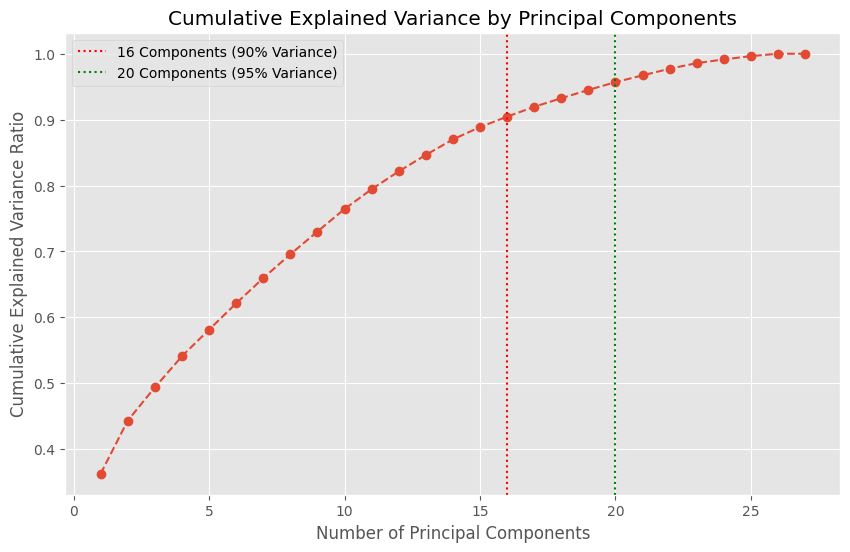

Choosing 16 components to explain at least 90% of the variance.
Data reduced to 16 principal components.
Total variance explained by 16 components: 90.45%

First 5 rows of PCA-transformed data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.355154  0.542808 -0.568607 -0.740069  0.960271 -0.492207  0.904291   
1 -2.479231 -1.636707  0.171132 -1.559970  0.216546 -1.415808  1.990674   
2 -1.219831  0.003976 -0.078722 -1.399139 -0.616900 -2.273230 -1.105552   
3  2.898293 -0.201247 -0.550764  0.038199 -0.776348  0.171285 -1.719444   
4 -1.840498  0.965142  0.184873 -0.508857  0.142508 -0.400520 -0.612956   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.389154 -0.415963  0.281390  0.836873 -0.617269 -0.244182  0.445545   
1 -1.582835  0.784925  0.363578  1.988404  0.397200  0.805389  0.260309   
2  0.004633 -0.023092  1.475459  0.976967  0.922590 -0.179838  1.093242   
3  1.010762 -0.332277  0.376879  0.206040  0.747590 -1.

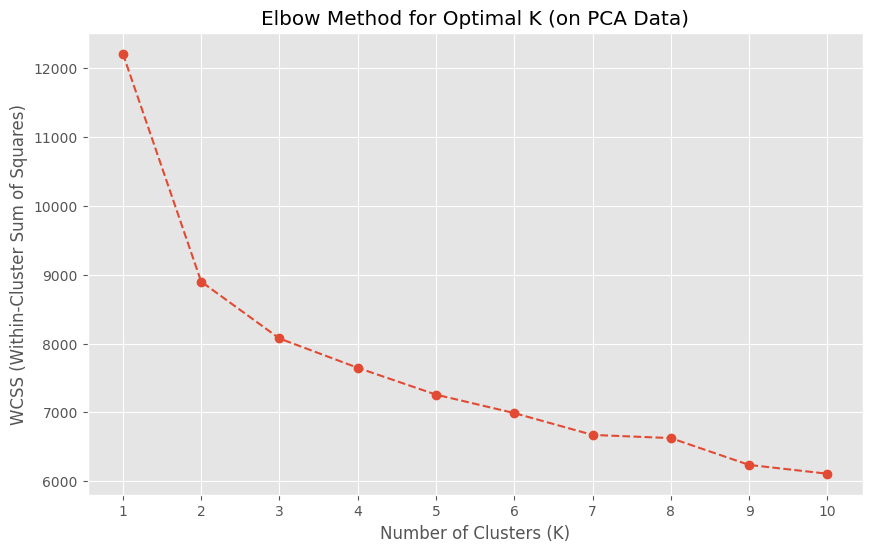


Review the Elbow Method plot on PCA data to choose an optimal 'K' for player archetypes.

Applying K-Means Clustering with K = 5 on PCA-reduced data.
K-Means clustering applied. 5 player archetypes identified.

--- Step 3: Interpretation of Player Archetypes ---

Average (Scaled) P90 Stats for Each Player Archetype:
                   passes_p90_avg  progressive_pass_distance_p90_avg  \
archetype_cluster                                                      
0                       -0.099692                           1.605678   
1                       -0.808830                          -0.599380   
2                       -0.103856                           0.527788   
3                        0.787649                          -0.508171   
4                        1.463906                           1.612586   

                   passes_into_final_third_p90_avg  key_passes_p90_avg  \
archetype_cluster                                                        
0                           

<ipython-input-4-466950817014>:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_archetypes = plt.cm.get_cmap('tab10', optimal_k_archetypes)


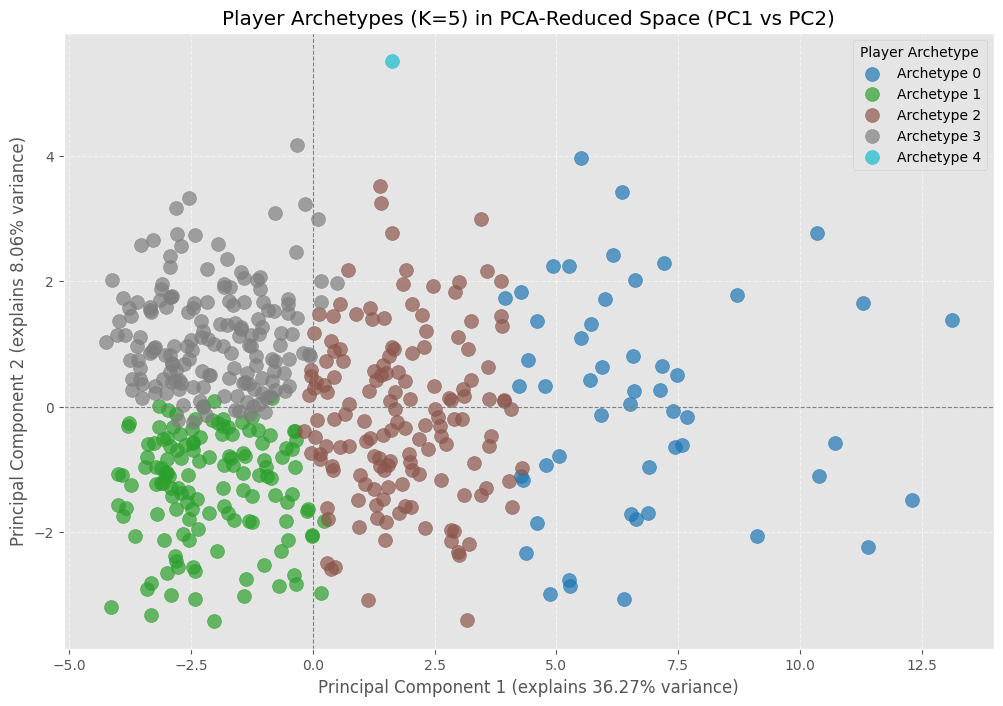

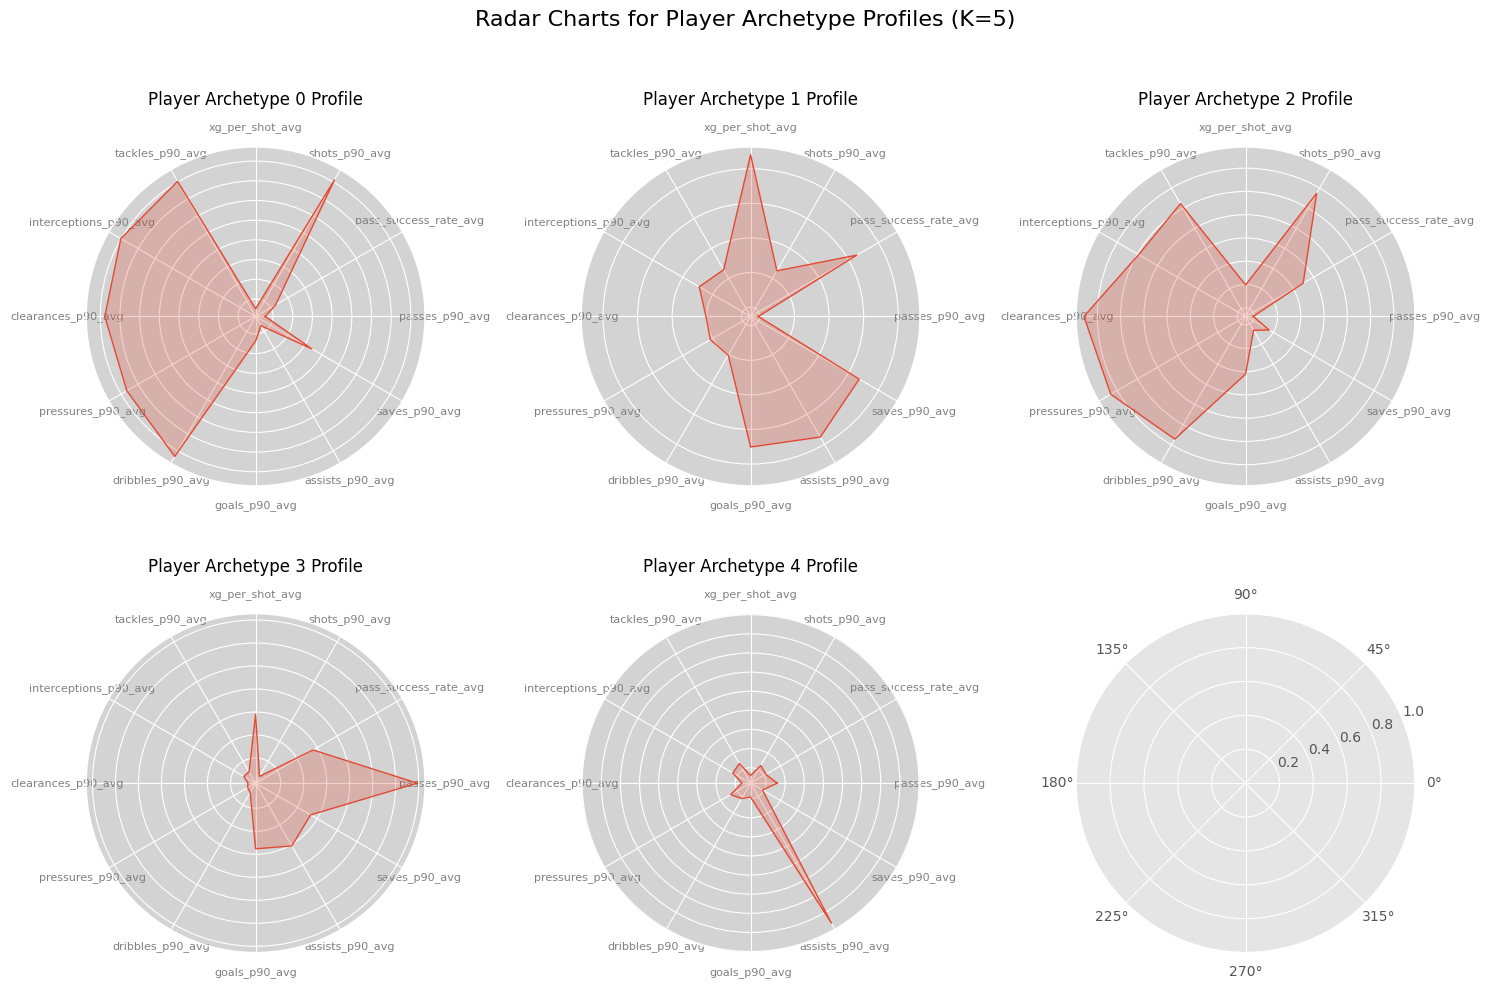


--- Summary of PCA and K-Means for Player Archetypes ---
PCA reduced the dimensionality of player performance data to 16 principal components, explaining 90.45% of the total variance.
K-Means clustering on these principal components identified 5 distinct player archetypes.

To interpret these archetypes:
1. Examine the 'Interpretation of Principal Components (Loadings)' section to understand what the principal components represent (e.g., PC1 = 'attacking strength', PC2 = 'defensive work rate').
2. Review the 'Average (Scaled) P90 Stats for Each Player Archetype' and the radar charts. These show the average performance profile of players within each archetype across the original scaled metrics.

Consider adjusting `n_components` for PCA and `optimal_k_archetypes` for K-Means to explore different levels of detail in player archetypes.


In [4]:
# This code assumes the following DataFrames/variables are already defined
# and populated from your previous cells:
# - premier_league_player_stats (and by extension player_stats_filtered, player_season_stats_p90)
# - players_for_clustering (filtered players with enough minutes and P90 stats)
# - X (original features for clustering)
# - X_scaled (standardized features for clustering)
# - X_scaled_df (DataFrame version of X_scaled)
# - clustering_features (list of column names used for clustering)
# - stats_to_normalize (list of original stats that were normalized to P90)

print("--- Starting PCA and K-Means Analysis for Player Archetypes ---")


# --- PCA: Dimensionality Reduction ---
print("\n--- Step 1: Dimensionality Reduction using PCA ---")

# Determine the optimal number of components for PCA
# We will fit PCA on the scaled data to get explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
# Add lines for common variance thresholds (e.g., 90%, 95%)
# Ensure there are enough components to reach these thresholds
if any(explained_variance_ratio_cumulative >= 0.90):
    n_90_variance = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1
    plt.axvline(x=n_90_variance, color='r', linestyle=':', label=f'{n_90_variance} Components (90% Variance)')
if any(explained_variance_ratio_cumulative >= 0.95):
    n_95_variance = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1
    plt.axvline(x=n_95_variance, color='g', linestyle=':', label=f'{n_95_variance} Components (95% Variance)')
plt.legend()
plt.show()

# Choose number of components based on explained variance (e.g., aiming for 90-95%)
# For demonstration, let's select components that explain at least 90% variance.
# If no components reach 90%, choose the total number of features available
if any(explained_variance_ratio_cumulative >= 0.90):
    n_components = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1
else:
    n_components = len(clustering_features) # Use all features if 90% not reached

print(f"Choosing {n_components} components to explain at least 90% of the variance.")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)], index=X.index)

print(f"Data reduced to {n_components} principal components.")
print(f"Total variance explained by {n_components} components: {pca.explained_variance_ratio_.sum():.2%}")
print("\nFirst 5 rows of PCA-transformed data:")
print(X_pca_df.head())

# Interpret Principal Components (Loadings)
print("\n--- Interpretation of Principal Components (Loadings) ---")
# Create a DataFrame to show component loadings
# Each row is a PC, each column is an original feature
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=clustering_features)
print("Top 5 features contributing to each Principal Component:")
for pc in pca_loadings.columns:
    # Sort by absolute value to see the most influential features (positive or negative)
    top_features = pca_loadings[pc].abs().sort_values(ascending=False).head(5).index.tolist()
    print(f"{pc}: {top_features}")
print("\nTo understand a PC, look at the signs of the features. For example, if 'goals_p90_avg' and 'shots_p90_avg' are high positive for PC1, it indicates attacking contribution.")


# --- K-Means Clustering on PCA-reduced Data ---
print("\n--- Step 2: K-Means Clustering on PCA-reduced Data ---") # Re-numbered step

# Determine optimal K for K-Means using Elbow Method on PCA data
wcss_pca = []
# Ensure range_n_clusters_pca does not exceed available samples
max_k_pca = min(10, X_pca.shape[0] - 1 if X_pca.shape[0] > 1 else 1) # Max K is (num_samples - 1)
if max_k_pca < 1:
    print("Not enough data points to run Elbow method for K-Means on PCA data. Skipping.")
    # Set a default optimal_k_archetypes if clustering cannot proceed
    optimal_k_archetypes = 1
else:
    range_n_clusters_pca = range(1, max_k_pca + 1)
    for i in range_n_clusters_pca:
        if i == 0: # Skip K=0
            continue
        kmeans_pca_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans_pca_temp.fit(X_pca)
        wcss_pca.append(kmeans_pca_temp.inertia_)

    if wcss_pca: # Only plot if WCSS values were collected
        plt.figure(figsize=(10, 6))
        plt.plot(range_n_clusters_pca, wcss_pca, marker='o', linestyle='--')
        plt.title('Elbow Method for Optimal K (on PCA Data)')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.xticks(range_n_clusters_pca)
        plt.grid(True)
        plt.show()

    print("\nReview the Elbow Method plot on PCA data to choose an optimal 'K' for player archetypes.")
    # Default optimal_k_archetypes. User should adjust based on plot.
    optimal_k_archetypes = 5
    if max_k_pca < optimal_k_archetypes:
        optimal_k_archetypes = max_k_pca # Ensure K does not exceed available samples


print(f"\nApplying K-Means Clustering with K = {optimal_k_archetypes} on PCA-reduced data.")
# Only proceed with clustering if optimal_k_archetypes is valid
if optimal_k_archetypes >= 1 and X_pca.shape[0] >= optimal_k_archetypes:
    kmeans_archetypes = KMeans(n_clusters=optimal_k_archetypes, init='k-means++', random_state=42, n_init=10)
    players_for_clustering['archetype_cluster'] = kmeans_archetypes.fit_predict(X_pca)
    print(f"K-Means clustering applied. {optimal_k_archetypes} player archetypes identified.")
else:
    print("Skipping K-Means clustering due to insufficient data or invalid K value.")
    players_for_clustering['archetype_cluster'] = -1 # Assign a default value if clustering is skipped


# --- Interpretation of Player Archetypes ---
print("\n--- Step 3: Interpretation of Player Archetypes ---") # Re-numbered step

# Check if archetypes were created before proceeding with interpretation/visualization
if 'archetype_cluster' in players_for_clustering.columns and players_for_clustering['archetype_cluster'].nunique() > 1: # Ensure more than one cluster
    # Calculate the mean of original (scaled) P90 stats for each archetype cluster
    # This helps understand the cluster profiles in terms of original features
    archetype_profiles_scaled = X_scaled_df.groupby(players_for_clustering['archetype_cluster']).mean().reset_index()
    archetype_profiles_scaled = archetype_profiles_scaled.set_index('archetype_cluster')

    print("\nAverage (Scaled) P90 Stats for Each Player Archetype:")
    print(archetype_profiles_scaled)


    # --- Visualizations for Player Archetypes ---
    print("\n--- Step 4: Visualizations for Player Archetypes ---") # Re-numbered step

    # --- PCA Scatter Plot with Archetype Clusters ---
    pca_plot_df = X_pca_df.copy()
    pca_plot_df['archetype_cluster'] = players_for_clustering['archetype_cluster'].values
    pca_plot_df['player_name'] = players_for_clustering['player_name'].values
    pca_plot_df['most_frequent_position'] = players_for_clustering['most_frequent_position'].values

    colors_archetypes = plt.cm.get_cmap('tab10', optimal_k_archetypes)

    plt.figure(figsize=(12, 8))
    for cluster_id in sorted(pca_plot_df['archetype_cluster'].unique()):
        cluster_data = pca_plot_df[pca_plot_df['archetype_cluster'] == cluster_id]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                    color=colors_archetypes(cluster_id), label=f'Archetype {cluster_id}', alpha=0.7, s=100)

    plt.title(f'Player Archetypes (K={optimal_k_archetypes}) in PCA-Reduced Space (PC1 vs PC2)')
    plt.xlabel(f'Principal Component 1 (explains {pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'Principal Component 2 (explains {pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.legend(title='Player Archetype')
    plt.show()

    # --- Radar Charts for Player Archetype Profiles (Scaled Averages) ---
    # Use a selected subset of features for radar charts for clarity
    radar_features_archetypes = [
        'passes_p90_avg', 'pass_success_rate_avg', 'shots_p90_avg', 'xg_per_shot_avg',
        'tackles_p90_avg', 'interceptions_p90_avg', 'clearances_p90_avg', 'pressures_p90_avg',
        'dribbles_p90_avg', 'goals_p90_avg', 'assists_p90_avg', 'saves_p90_avg'
    ]

    # Filter out features that are all zero or have no variance across clusters
    radar_features_filtered_archetypes = [
        f for f in radar_features_archetypes if f in archetype_profiles_scaled.columns and archetype_profiles_scaled[f].var() > 1e-9
    ]
    if 'saves_p90_avg' in radar_features_filtered_archetypes and (archetype_profiles_scaled['saves_p90_avg'] == 0).all():
        radar_features_filtered_archetypes.remove('saves_p90_avg')

    if not radar_features_filtered_archetypes:
        print("No suitable features for radar chart after filtering for variance across archetypes. Skipping radar charts.")
    else:
        angles_archetypes = [n / float(len(radar_features_filtered_archetypes)) * 2 * math.pi for n in range(len(radar_features_filtered_archetypes))]
        angles_archetypes += angles_archetypes[:1]

        fig_archetypes, axes_archetypes = plt.subplots(figsize=(15, 10), nrows=2, ncols=math.ceil(optimal_k_archetypes / 2),
                                                     subplot_kw={'polar': True})
        axes_archetypes = axes_archetypes.flatten()

        for i, ax in enumerate(axes_archetypes[:optimal_k_archetypes]):
            if i < len(archetype_profiles_scaled):
                values = archetype_profiles_scaled.iloc[i][radar_features_filtered_archetypes].tolist()
                values += values[:1]

                ax.plot(angles_archetypes, values, linewidth=1, linestyle='solid', label=f'Archetype {i}')
                ax.fill(angles_archetypes, values, alpha=0.25)
                ax.set_yticklabels([])
                ax.set_xticks(angles_archetypes[:-1])
                ax.set_xticklabels(radar_features_filtered_archetypes, color='grey', size=8)
                ax.set_title(f'Player Archetype {i} Profile', size=12, color='black', y=1.1)
                ax.set_facecolor('lightgray')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.suptitle(f'Radar Charts for Player Archetype Profiles (K={optimal_k_archetypes})', size=16, color='black', y=1.0)
        plt.show()

    print("\n--- Summary of PCA and K-Means for Player Archetypes ---")
    print(f"PCA reduced the dimensionality of player performance data to {n_components} principal components, explaining {pca.explained_variance_ratio_.sum():.2%} of the total variance.")
    print(f"K-Means clustering on these principal components identified {optimal_k_archetypes} distinct player archetypes.")
    print("\nTo interpret these archetypes:")
    print("1. Examine the 'Interpretation of Principal Components (Loadings)' section to understand what the principal components represent (e.g., PC1 = 'attacking strength', PC2 = 'defensive work rate').")
    print("2. Review the 'Average (Scaled) P90 Stats for Each Player Archetype' and the radar charts. These show the average performance profile of players within each archetype across the original scaled metrics.")
    print("\nConsider adjusting `n_components` for PCA and `optimal_k_archetypes` for K-Means to explore different levels of detail in player archetypes.")
else:
    print("\nSkipping archetype interpretation and visualization as clustering was not successfully performed or resulted in less than 2 distinct clusters.")

In [7]:
# This code assumes the following DataFrames/variables are already defined
# and populated from your previous cells:
# - players_for_clustering: DataFrame containing player_id, player_name,
#   most_frequent_position, total_minutes_played, and 'archetype_cluster'.
# - archetype_profiles_scaled: DataFrame with scaled mean features for each archetype cluster.
# - player_season_stats_p90: DataFrame with unscaled P90 average stats for all players.
# - premier_league_matches: DataFrame with match details.
# - premier_league_team_stats: DataFrame with team-level stats per match.
# - premier_league_player_stats: DataFrame with player-level stats per match.
# - stats_to_normalize: List of original statistical features.
# - X_scaled_df: DataFrame with scaled features, useful for comparing individual player performance against archetype profiles.


print("--- Summarizing Clustering Results and Performing Team Analysis ---")

# --- 1. Define Player Role Groups (Re-define for clarity in this cell) ---
player_role_groups_map = {
    "Defenders": ["Right Back", "Left Back", "Centre Back"],
    "Midfielders": ["Defensive Midfielder", "Central Midfielder", "Attacking Midfielder"],
    "Attackers": ["Right Winger", "Left Winger", "Striker", "Second Striker"]
}

# Combine players_for_clustering with the unscaled P90 stats for ranking
# This ensures we have both archetype labels and original performance for ranking
player_archetypes_with_stats = players_for_clustering.merge(
    player_season_stats_p90.drop(columns=['most_frequent_position', 'total_minutes_played']),
    on=['player_id', 'player_name'],
    how='inner'
)

# --- Function to describe a cluster and find top players ---
def summarize_archetype(cluster_id, archetype_profiles_scaled_df, players_df, group_name, top_n=5):
    """
    Summarizes the characteristics of an archetype and lists top players.
    :param cluster_id: The ID of the archetype to summarize.
    :param archetype_profiles_scaled_df: DataFrame of scaled archetype profiles.
    :param players_df: DataFrame of players with their cluster and unscaled stats.
    :param group_name: The broad player group (e.g., "Defenders").
    :param top_n: Number of top players to list.
    """
    if cluster_id not in archetype_profiles_scaled_df.index:
        print(f"  Archetype {cluster_id} not found in profiles.")
        return

    profile = archetype_profiles_scaled_df.loc[cluster_id]
    
    # Sort features by their scaled value to identify key characteristics
    # Positive values indicate higher than average for the overall dataset
    # Negative values indicate lower than average
    sorted_profile = profile.sort_values(ascending=False)
    
    print(f"\n  Archetype {cluster_id} ({group_name} Focus):")
    print("    Key Characteristics (Top 5 Positive & Negative Contributions on Scaled Data):")
    
    # Display top features (positive and negative contribution)
    positive_features = sorted_profile[sorted_profile > 0].head(5)
    negative_features = sorted_profile[sorted_profile < 0].tail(5) # Use tail for smallest (most negative)

    if not positive_features.empty:
        print("      Higher than average in:")
        for feature, value in positive_features.items():
            print(f"        - {feature.replace('_p90_avg', '').replace('_avg', '').replace('_', ' ').title()}: {value:.2f} (scaled)")
    if not negative_features.empty:
        print("      Lower than average in:")
        for feature, value in negative_features.items():
            print(f"        - {feature.replace('_p90_avg', '').replace('_avg', '').replace('_', ' ').title()}: {value:.2f} (scaled)")

    # Find top players for this archetype within the original unscaled data
    archetype_players = players_df[players_df['archetype_cluster'] == cluster_id].copy()

    if archetype_players.empty:
        print(f"    No players assigned to Archetype {cluster_id} in the filtered group.")
        return

    # Define a simple composite score based on the role group
    # These are illustrative scores; actual weights would be data-driven/domain-expert driven
    if group_name == "Defenders":
        archetype_players['composite_score'] = (
            archetype_players.get('tackles_p90_avg', 0) * 2 +
            archetype_players.get('interceptions_p90_avg', 0) * 2 +
            archetype_players.get('clearances_p90_avg', 0) * 1.5 -
            archetype_players.get('fouls_committed_p90_avg', 0) * 1
        )
    elif group_name == "Midfielders":
        archetype_players['composite_score'] = (
            archetype_players.get('passes_p90_avg', 0) * 1.5 +
            archetype_players.get('progressive_pass_distance_p90_avg', 0) * 1 +
            archetype_players.get('key_passes_p90_avg', 0) * 2 +
            archetype_players.get('tackles_p90_avg', 0) * 1 +
            archetype_players.get('assists_p90_avg', 0) * 1.5
        )
    elif group_name == "Attackers":
        archetype_players['composite_score'] = (
            archetype_players.get('goals_p90_avg', 0) * 3 +
            archetype_players.get('assists_p90_avg', 0) * 2 +
            archetype_players.get('shots_p90_avg', 0) * 1.5 +
            archetype_players.get('successful_dribbles_p90_avg', 0) * 1
        )
    else: # General for other archetypes or Goalkeepers
        archetype_players['composite_score'] = (
            archetype_players.get('goals_p90_avg', 0) * 2 +
            archetype_players.get('assists_p90_avg', 0) * 2 +
            archetype_players.get('passes_p90_avg', 0) * 0.5 +
            archetype_players.get('tackles_p90_avg', 0) * 0.5 +
            archetype_players.get('saves_p90_avg', 0) * 3 # High weight for GKs
        )
        # Ensure Goalkeepers are primarily evaluated on saves
        if 'Goalkeeper' in players_df[players_df['archetype_cluster'] == cluster_id]['most_frequent_position'].unique():
            archetype_players['composite_score'] = archetype_players.get('saves_p90_avg', 0) * 10


    top_players = archetype_players.sort_values(by='composite_score', ascending=False).head(top_n)

    print(f"\n    Top {top_n} Players in this Archetype (by Composite Score):")
    if not top_players.empty:
        for idx, row in top_players.iterrows():
            print(f"      - {row['player_name']} (Pos: {row['most_frequent_position']}, Score: {row['composite_score']:.2f})")
    else:
        print("      No top players found.")


# --- 1) Distinct Defensive Roles ---
print("\n" + "="*80)
print("1) Distinct Defensive Roles")
print("="*80)

defensive_positions = player_role_groups_map["Defenders"]
defensive_players = player_archetypes_with_stats[
    player_archetypes_with_stats['most_frequent_position'].isin(defensive_positions)
].copy()

# Identify archetypes that have defensive players
defensive_archetypes = sorted(defensive_players['archetype_cluster'].unique())

# Fix: Use 'if not list_name' to check if a list is empty
if defensive_archetypes and defensive_archetypes[0] != -1: # Exclude -1 if clustering was skipped
    for cluster_id in defensive_archetypes:
        summarize_archetype(cluster_id, archetype_profiles_scaled, defensive_players, "Defensive")
else:
    print("No distinct defensive archetypes identified or clustering was skipped.")


# --- 2) Distinct Midfield Roles ---
print("\n" + "="*80)
print("2) Distinct Midfield Roles")
print("="*80)

midfield_positions = player_role_groups_map["Midfielders"]
midfield_players = player_archetypes_with_stats[
    player_archetypes_with_stats['most_frequent_position'].isin(midfield_positions)
].copy()

midfield_archetypes = sorted(midfield_players['archetype_cluster'].unique())

# Fix: Use 'if not list_name' to check if a list is empty
if midfield_archetypes and midfield_archetypes[0] != -1:
    for cluster_id in midfield_archetypes:
        summarize_archetype(cluster_id, archetype_profiles_scaled, midfield_players, "Midfield")
else:
    print("No distinct midfield archetypes identified or clustering was skipped.")


# --- 3) Distinct Attacking Roles ---
print("\n" + "="*80)
print("3) Distinct Attacking Roles")
print("="*80)

attacking_positions = player_role_groups_map["Attackers"]
attacking_players = player_archetypes_with_stats[
    player_archetypes_with_stats['most_frequent_position'].isin(attacking_positions)
].copy()

attacking_archetypes = sorted(attacking_players['archetype_cluster'].unique())

# Fix: Use 'if not list_name' to check if a list is empty
if attacking_archetypes and attacking_archetypes[0] != -1:
    for cluster_id in attacking_archetypes:
        summarize_archetype(cluster_id, archetype_profiles_scaled, attacking_players, "Attacking")
else:
    print("No distinct attacking archetypes identified or clustering was skipped.")


# --- 4) Additional Analysis for Liverpool ---
print("\n" + "="*80)
print("4) Analysis for Liverpool: Improving Performance in Lost Games")
print("="*80)

LIVERPOOL_TEAM_NAME = "Liverpool"

# Find Liverpool's lost matches
liverpool_losses = premier_league_matches[
    ((premier_league_matches['home_team_name'] == LIVERPOOL_TEAM_NAME) & (premier_league_matches['home_score'] < premier_league_matches['away_score'])) |
    ((premier_league_matches['away_team_name'] == LIVERPOOL_TEAM_NAME) & (premier_league_matches['away_score'] < premier_league_matches['home_score']))
].copy()

if liverpool_losses.empty:
    print(f"No lost matches found for {LIVERPOOL_TEAM_NAME} in the dataset. Cannot perform loss analysis.")
else:
    print(f"Found {len(liverpool_losses)} lost matches for {LIVERPOOL_TEAM_NAME}.")

    # Get match IDs for these losses
    lost_match_ids = liverpool_losses['match_id'].tolist()

    # Filter team stats for Liverpool in lost matches
    liverpool_team_stats_losses = premier_league_team_stats[
        (premier_league_team_stats['team_name'] == LIVERPOOL_TEAM_NAME) &
        (premier_league_team_stats['match_id'].isin(lost_match_ids))
    ].copy()

    # Filter player stats for Liverpool in lost matches and merge with archetype info
    liverpool_player_stats_losses = premier_league_player_stats[
        (premier_league_player_stats['team_name'] == LIVERPOOL_TEAM_NAME) &
        (premier_league_player_stats['match_id'].isin(lost_match_ids))
    ].merge(
        players_for_clustering[['player_id', 'player_name', 'archetype_cluster']],
        on=['player_id', 'player_name'],
        how='left'
    )
    # Handle players not in clustering (e.g., played < MIN_MINUTES_FOR_CLUSTERING)
    liverpool_player_stats_losses['archetype_cluster'] = liverpool_player_stats_losses['archetype_cluster'].fillna(-1).astype(int)


    if not liverpool_team_stats_losses.empty:
        # Calculate average team performance in lost games
        avg_team_stats_losses = liverpool_team_stats_losses[[
            'possession_percentage', 'possession_duration_final_third',
            'opponent_half_pressures', 'ppda', 'attacking_third_entries_passes',
            'attacking_third_entries_carries', 'set_piece_shots', 'set_piece_goals'
        ]].mean()

        print(f"\nAverage Team Performance for {LIVERPOOL_TEAM_NAME} in Lost Games:")
        print(avg_team_stats_losses)

        # Identify weaknesses (qualitative interpretation based on average stats)
        weaknesses = []
        if avg_team_stats_losses['possession_percentage'] < 50:
            weaknesses.append("low possession")
        if avg_team_stats_losses['possession_duration_final_third'] < 15:
            weaknesses.append("limited time in attacking third")
        if avg_team_stats_losses['ppda'] > 15: # High PPDA means less intense pressing
            weaknesses.append("less intense pressing")
        if avg_team_stats_losses['attacking_third_entries_passes'] < 30 and avg_team_stats_losses['attacking_third_entries_carries'] < 10:
            weaknesses.append("difficulty entering attacking third")
        if avg_team_stats_losses['set_piece_goals'] < 0.5:
            weaknesses.append("ineffective set-pieces")

        print(f"\nIdentified Weaknesses for {LIVERPOOL_TEAM_NAME} in Lost Games: {', '.join(weaknesses) if weaknesses else 'None obvious from these metrics.'}")

        # Suggest archetypes to address weaknesses
        print("\nSuggested Player Archetypes to Address Weaknesses (based on their profiles):")
        
        suggested_archetypes = []

        # Example logic to suggest archetypes based on weaknesses
        if "low possession" in weaknesses or "limited time in attacking third" in weaknesses:
            print("  - To improve possession and attacking third presence:")
            # Look for archetypes with high passes, progressive passes, carries into final third
            for cluster_id in sorted(archetype_profiles_scaled.index):
                profile = archetype_profiles_scaled.loc[cluster_id]
                if profile.get('passes_p90_avg', 0) > 0.5 and profile.get('progressive_pass_distance_p90_avg', 0) > 0.5 and profile.get('carries_into_final_third_p90_avg', 0) > 0.5: # Example thresholds (scaled)
                    suggested_archetypes.append(f"    * Archetype {cluster_id} (High Volume Progressive Passer/Carrier)")
        
        if "less intense pressing" in weaknesses:
            print("  - To improve pressing intensity:")
            # Look for archetypes with high pressures
            for cluster_id in sorted(archetype_profiles_scaled.index):
                profile = archetype_profiles_scaled.loc[cluster_id]
                if profile.get('pressures_p90_avg', 0) > 1.0: # Example threshold (scaled)
                    suggested_archetypes.append(f"    * Archetype {cluster_id} (High Pressing Midfielder/Forward)")

        if "difficulty entering attacking third" in weaknesses:
            print("  - To improve attacking third entries:")
            # Look for archetypes with high key passes, dribbles, progressive carries
            for cluster_id in sorted(archetype_profiles_scaled.index):
                profile = archetype_profiles_scaled.loc[cluster_id]
                if profile.get('key_passes_p90_avg', 0) > 0.5 and profile.get('successful_dribbles_p90_avg', 0) > 0.5: # Example thresholds (scaled)
                    suggested_archetypes.append(f"    * Archetype {cluster_id} (Creative Playmaker/Dribbler)")

        if "ineffective set-pieces" in weaknesses:
            print("  - To improve set-piece effectiveness:")
            # This is harder to infer from player archetypes alone, as it's a team stat.
            # But a player strong in 'aerial_duels_won' could contribute.
            for cluster_id in sorted(archetype_profiles_scaled.index):
                profile = archetype_profiles_scaled.loc[cluster_id]
                if profile.get('aerial_duels_won_p90_avg', 0) > 1.0 and profile.get('goals_p90_avg', 0) > 0.5:
                    suggested_archetypes.append(f"    * Archetype {cluster_id} (Aerial Threat/Finisher)")
        
        if not suggested_archetypes:
            print("  No specific archetype suggestions based on current weaknesses and archetype profiles.")
        else:
            for suggestion in sorted(set(suggested_archetypes)): # Use set to avoid duplicates and sort
                print(suggestion)

    else:
        print(f"No team statistics found for {LIVERPOOL_TEAM_NAME} in lost matches.")

    # Media-style summary
    print("\n--- Media-Style Summary ---")
    
    # Identify Liverpool's most common archetype in losses (if applicable)
    if 'archetype_cluster' in liverpool_player_stats_losses.columns and liverpool_player_stats_losses['archetype_cluster'].nunique() > 1:
        # Get count of each archetype that played for Liverpool in losses
        archetype_counts_in_losses = liverpool_player_stats_losses[
            liverpool_player_stats_losses['archetype_cluster'] != -1 # Exclude unclustered
        ]['archetype_cluster'].value_counts()

        if not archetype_counts_in_losses.empty:
            most_common_archetype_id = archetype_counts_in_losses.idxmax()
            
            # Find the most distinctive features of this archetype
            profile_for_media = archetype_profiles_scaled.loc[most_common_archetype_id].sort_values(ascending=False)
            
            # Describe in simpler terms
            style_description = []
            if profile_for_media.get('passes_p90_avg', 0) > 1.0: style_description.append("high passing volume")
            if profile_for_media.get('progressive_pass_distance_p90_avg', 0) > 1.0: style_description.append("progressive ball movement")
            if profile_for_media.get('pressures_p90_avg', 0) > 1.0: style_description.append("intense pressing")
            if profile_for_media.get('goals_p90_avg', 0) > 1.0: style_description.append("goal-scoring threat")
            if profile_for_media.get('tackles_p90_avg', 0) > 1.0: style_description.append("strong defensive actions")

            style_description_str = ", ".join(style_description) if style_description else "balanced"

            print(f"This season, our analysis suggests {LIVERPOOL_TEAM_NAME} often features players predominantly from a '{style_description_str}' archetype (Archetype {most_common_archetype_id}) in their line-ups during games they lose. This suggests areas where additional player profiles might offer tactical flexibility.")
        else:
             print(f"No clustered player archetypes found for {LIVERPOOL_TEAM_NAME} in lost games to summarize team style.")
    else:
        print(f"Clustering results for {LIVERPOOL_TEAM_NAME} players in lost matches are not sufficient for a detailed team style summary.")

print("\n--- Summary Analysis Complete ---")
print("Review the outputs above for detailed insights into player roles and Liverpool's performance.")

--- Summarizing Clustering Results and Performing Team Analysis ---

1) Distinct Defensive Roles

  Archetype 0 (Defensive Focus):
    Key Characteristics (Top 5 Positive & Negative Contributions on Scaled Data):
      Higher than average in:
        - Progressive Carries: 1.85 (scaled)
        - Dribbles: 1.83 (scaled)
        - Aerial Duels Won: 1.83 (scaled)
        - Fouls Committed: 1.80 (scaled)
        - Shots: 1.78 (scaled)
      Lower than average in:
        - Short Passes: -0.09 (scaled)
        - Passes: -0.10 (scaled)
        - Xg Per Shot: -0.12 (scaled)
        - Through Balls: -0.19 (scaled)
        - Passes Into Final Third: -0.30 (scaled)

    Top 5 Players in this Archetype (by Composite Score):
      - Dominik Casemiro (Pos: Centre Back, Score: 0.00)
      - Raphael Tielemans (Pos: Centre Back, Score: 0.00)
      - Liam Zinchenko (Pos: Left Back, Score: 0.00)
      - Lewis Enzo (Pos: Left Back, Score: 0.00)
      - Declan Rice (Pos: Right Back, Score: 0.00)

  Arche